In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# loding data
churn  = pd.read_excel(r'C:/Users/mohan/Downloads/Research Project/dataset/Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')

In [3]:
# checking of the data if loaded correctly
print("top 5 observations in data")
churn.head()

top 5 observations in data


AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
# checking shape of dataset
print("The shape of dataset is :{}".format(churn.shape))

The shape of dataset is :(11260, 19)


In [6]:
# describing data
churn.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [7]:
# describing data including object variable as well
churn.describe(include='all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [8]:
# checking for null values
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [9]:
# checking for duplicate values
print("Number of duplicate rows:",churn.duplicated().sum())

Number of duplicate rows: 0


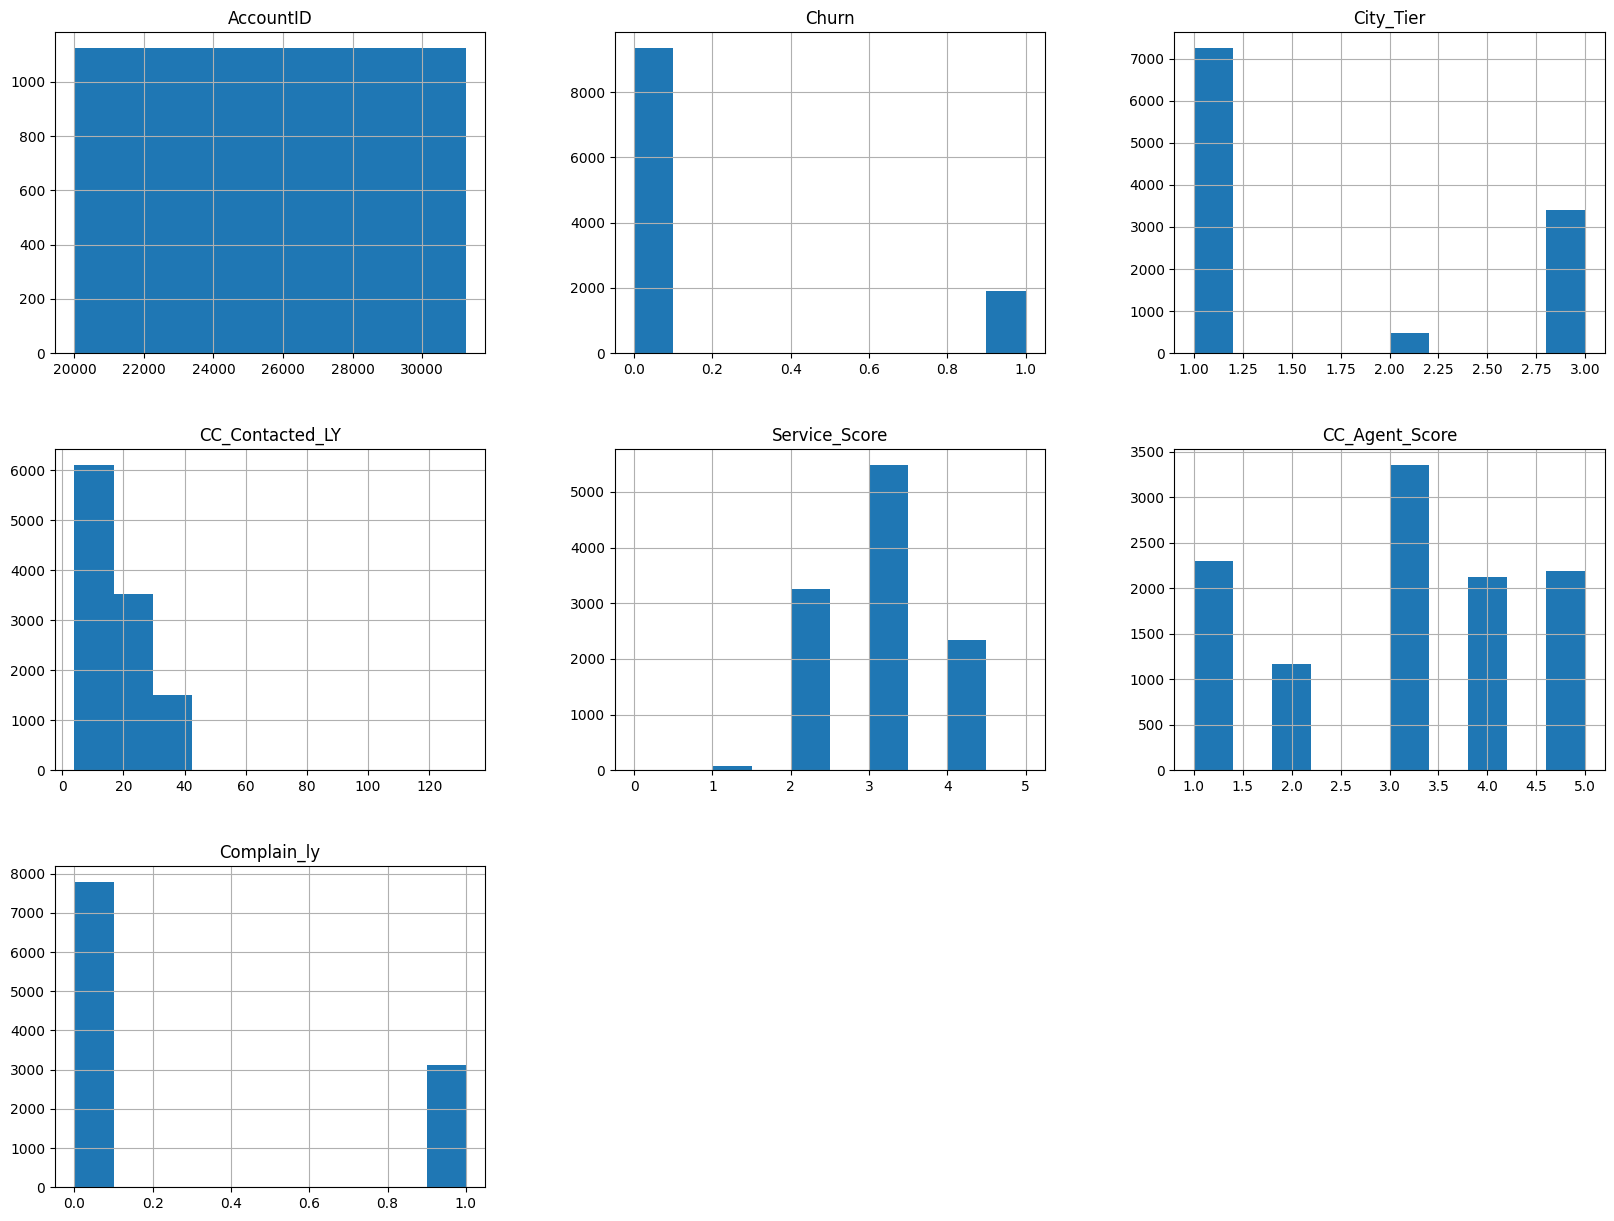

In [10]:
#checking for skewness
churn.hist(figsize=(20,15));

In [11]:
churn = churn[churn['Tenure']!='#']

In [12]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11144 non-null  int64  
 1   Churn                    11144 non-null  int64  
 2   Tenure                   11042 non-null  object 
 3   City_Tier                11032 non-null  float64
 4   CC_Contacted_LY          11042 non-null  float64
 5   Payment                  11035 non-null  object 
 6   Gender                   11036 non-null  object 
 7   Service_Score            11046 non-null  float64
 8   Account_user_count       11032 non-null  object 
 9   account_segment          11047 non-null  object 
 10  CC_Agent_Score           11028 non-null  float64
 11  Marital_Status           10932 non-null  object 
 12  rev_per_month            11042 non-null  object 
 13  Complain_ly              10787 non-null  float64
 14  rev_growth_yoy           11

In [13]:
# # kest check kurtosis and skewness of data
# print("kurtosis and skewness of dataste is as below")
# pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)


import pandas as pd

# Assuming 'churn' is your DataFrame
# Select only numeric columns
numeric_churn = churn.select_dtypes(include=['number'])

# Calculate kurtosis and skewness
kurtosis_values = numeric_churn.kurtosis()
skewness_values = numeric_churn.skew()

# Create a DataFrame for the results
result_df = pd.DataFrame(data = [kurtosis_values, skewness_values], index=['Kurtosis','Skewness']).T.round(2)

# Display the result
print("Kurtosis and skewness of dataset is as below")
result_df

Kurtosis and skewness of dataset is as below


Kurtosis  Skewness
AccountID           -1.20      0.00
Churn                1.16      1.78
City_Tier           -1.40      0.74
CC_Contacted_LY      8.29      1.43
Service_Score       -0.67      0.00
CC_Agent_Score      -1.12     -0.14
Complain_ly         -1.09      0.95

In [14]:
# Calculate standard deviation
std_devs = numeric_churn.std()

# Display the result
print("Standard deviation of variables:")
print(std_devs)

Standard deviation of variables:
AccountID          3251.040643
Churn                 0.373788
City_Tier             0.914893
CC_Contacted_LY       8.858895
Service_Score         0.725905
CC_Agent_Score        1.379550
Complain_ly           0.451246
dtype: float64


In [15]:
# # to perform uni-variate analysis on continous variable, lets plot the box plots and distribution plots
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# #checking for outliers using box plot
# churn.boxplot(figsize=(20,10))

In [16]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_churn.quantile(0.25)
Q3 = numeric_churn.quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine outliers for each column
outliers = ((numeric_churn < (Q1 - 1.5 * IQR)) | (numeric_churn > (Q3 + 1.5 * IQR)))

# Calculate the percentage of outliers in each column
percentage_outliers = outliers.sum() / len(numeric_churn) * 100

# Display the result
print("Percentage of outliers in each column:")
print(percentage_outliers)

Percentage of outliers in each column:
AccountID           0.000000
Churn              16.789304
City_Tier           0.000000
CC_Contacted_LY     0.376884
Service_Score       0.116655
CC_Agent_Score      0.000000
Complain_ly         0.000000
dtype: float64


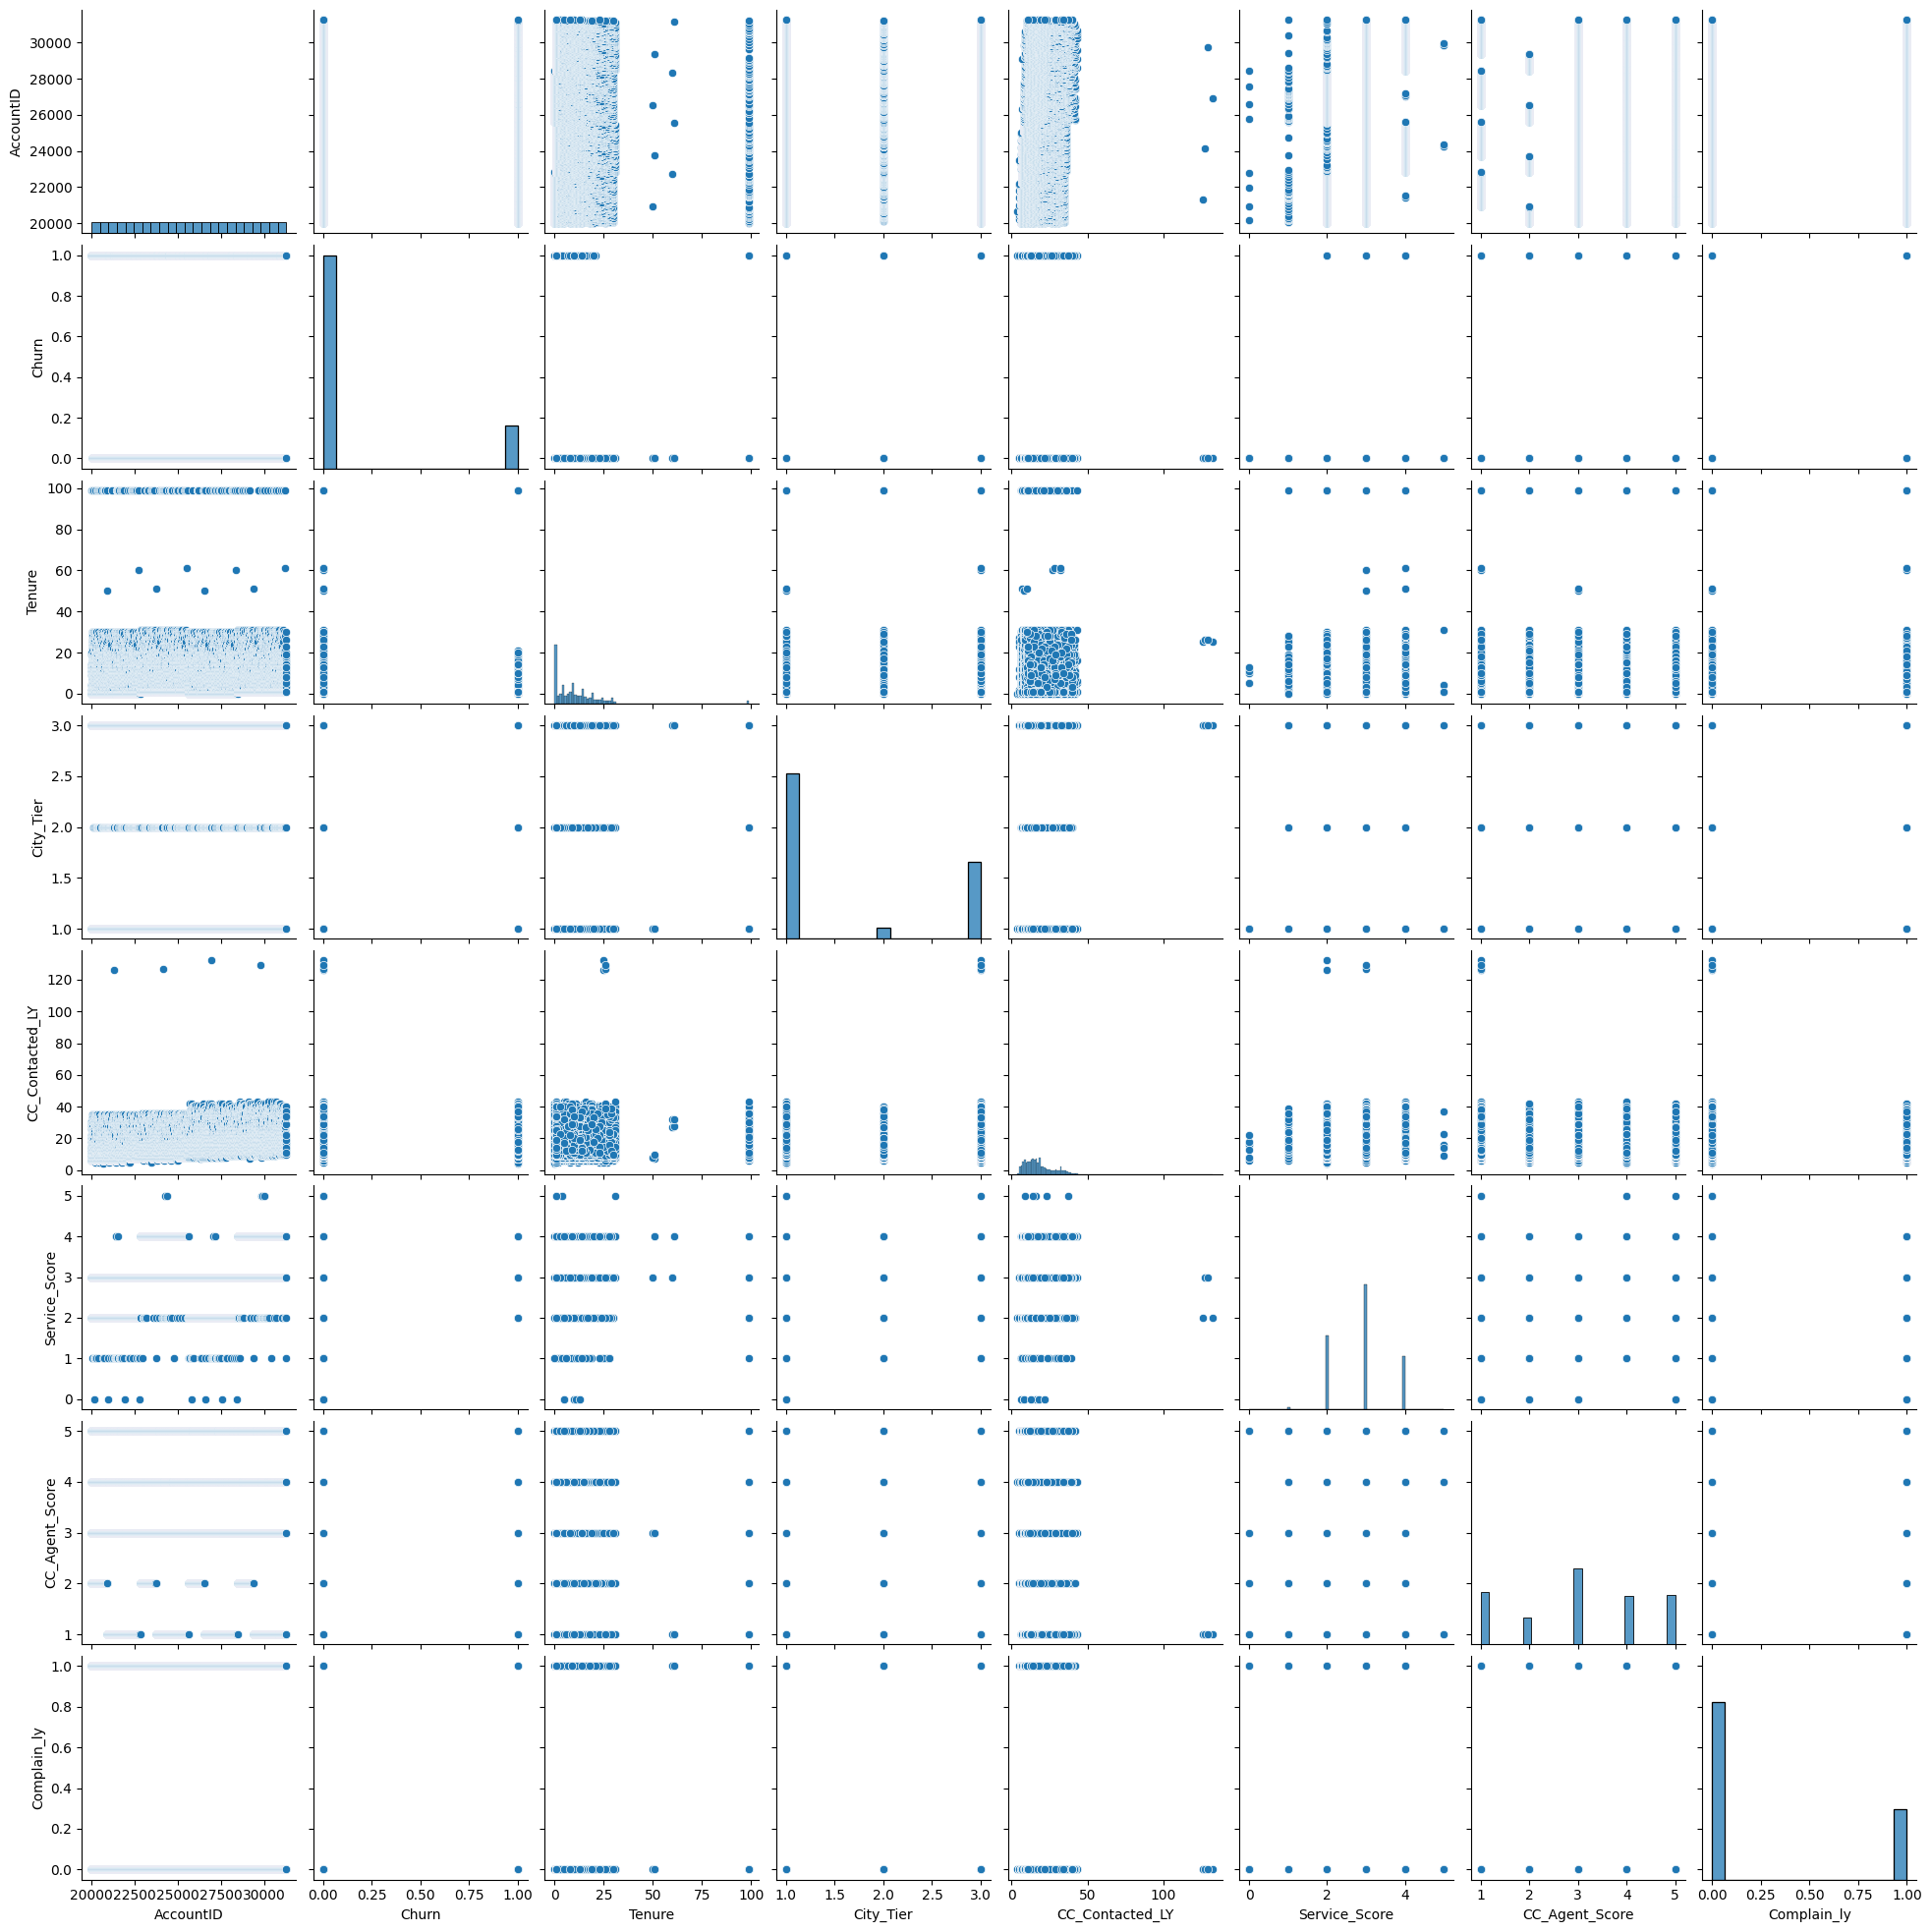

In [17]:
#the pair plot:-
sns.pairplot(data = churn)
plt.show()

In [18]:

# Calculate covariance matrix
cov_matrix = numeric_churn.cov()

# Display the result
print("Covariance matrix:")
print(cov_matrix)


Covariance matrix:
                    AccountID      Churn  City_Tier  CC_Contacted_LY  \
AccountID        1.056927e+07 -10.846146   4.639721      7267.638293   
Churn           -1.084615e+01   0.139718   0.029188         0.244780   
City_Tier        4.639721e+00   0.029188   0.837029         0.104591   
CC_Contacted_LY  7.267638e+03   0.244780   0.104591        78.480025   
Service_Score    7.142920e+02   0.002313  -0.004311         0.391054   
CC_Agent_Score  -8.460080e+01   0.054631  -0.013097        -0.031031   
Complain_ly     -5.370281e+00   0.042464   0.001825         0.109582   

                 Service_Score  CC_Agent_Score  Complain_ly  
AccountID           714.291998      -84.600805    -5.370281  
Churn                 0.002313        0.054631     0.042464  
City_Tier            -0.004311       -0.013097     0.001825  
CC_Contacted_LY       0.391054       -0.031031     0.109582  
Service_Score         0.526938        0.031019     0.001057  
CC_Agent_Score        0.031019  

In [19]:
corr_matrix = numeric_churn.corr()

# Display the result
print("Correlation matrix:")
print(corr_matrix)

Correlation matrix:
                 AccountID     Churn  City_Tier  CC_Contacted_LY  \
AccountID         1.000000 -0.008925   0.001559         0.252418   
Churn            -0.008925  1.000000   0.085319         0.073935   
City_Tier         0.001559  0.085319   1.000000         0.012915   
CC_Contacted_LY   0.252418  0.073935   0.012915         1.000000   
Service_Score     0.302556  0.008523  -0.006491         0.060777   
CC_Agent_Score   -0.018857  0.106002  -0.010375        -0.002539   
Complain_ly      -0.003660  0.251650   0.004418         0.027408   

                 Service_Score  CC_Agent_Score  Complain_ly  
AccountID             0.302556       -0.018857    -0.003660  
Churn                 0.008523        0.106002     0.251650  
City_Tier            -0.006491       -0.010375     0.004418  
CC_Contacted_LY       0.060777       -0.002539     0.027408  
Service_Score         1.000000        0.030957     0.003227  
CC_Agent_Score        0.030957        1.000000    -0.031795  
C

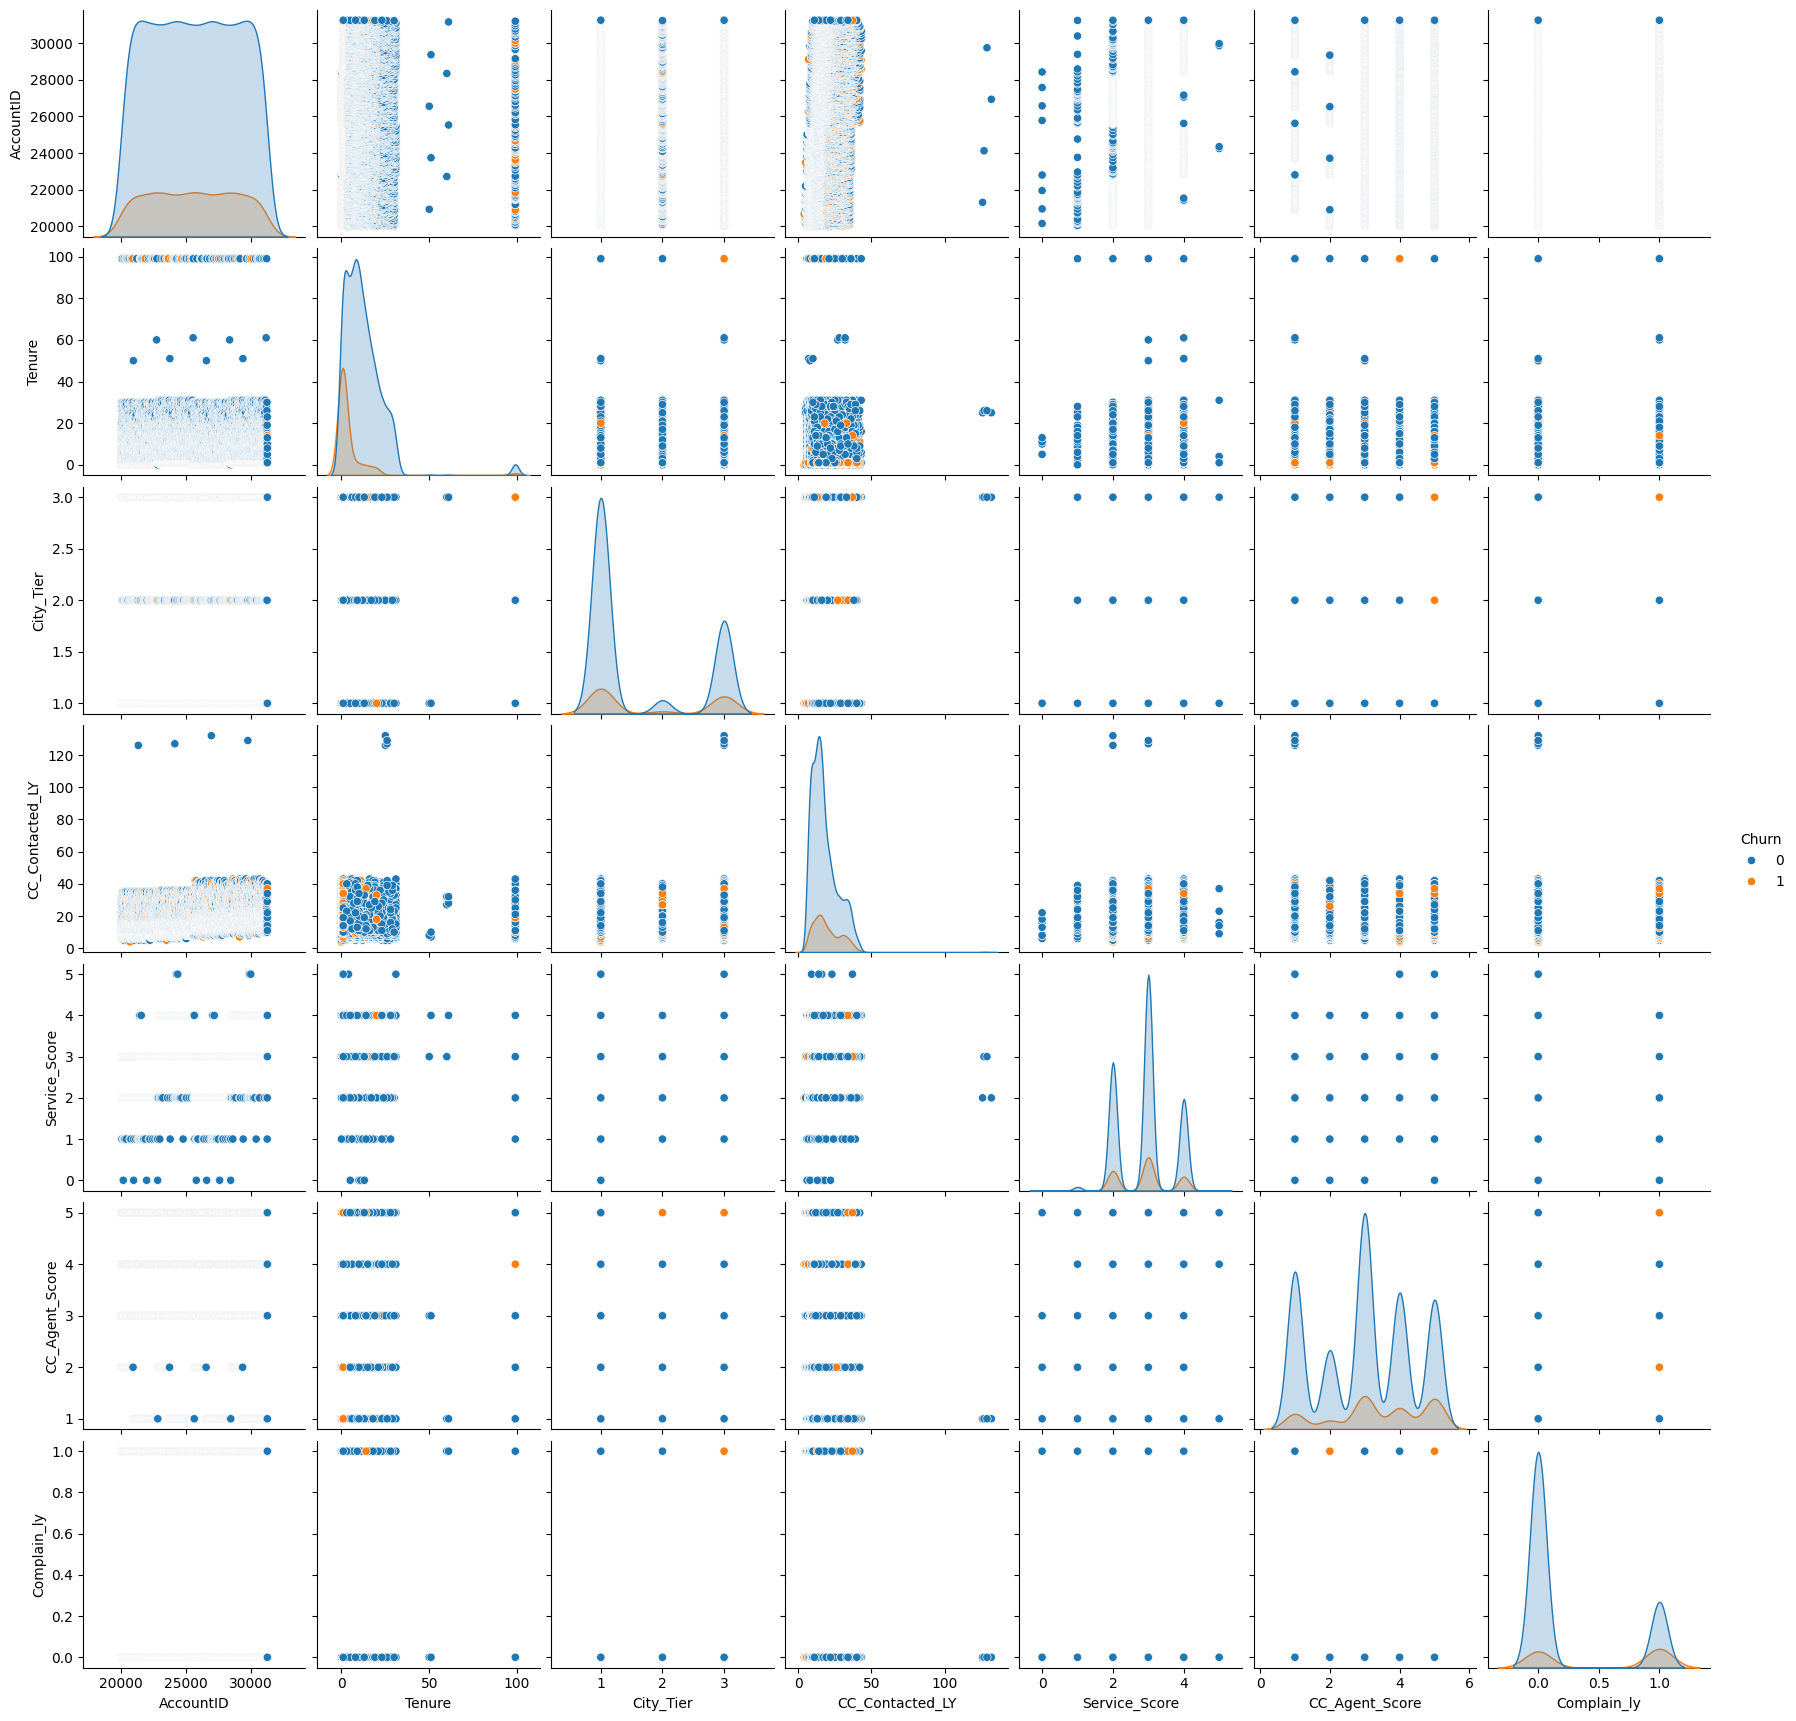

In [20]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(churn, hue = 'Churn', diag_kind='kde')  
plt.show()

In [21]:
#checking if the data is balanced or not
churn.groupby(["Churn"]).count()

AccountID  Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Churn                                                                   
0           9273    9194       9178             9189     9186    9187   
1           1871    1848       1854             1853     1849    1849   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
Churn                                                                       
0               9191                9180             9194            9179   
1               1855                1852             1853            1849   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
Churn                                                               
0                9093           9187         8974            9273   
1                1839           1855         1813            1871   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
Churn                                                                         
0                         9273                  8980      8887          9094  
1                         1871                  1807      1786          1829

# Uni-Variate Analysis

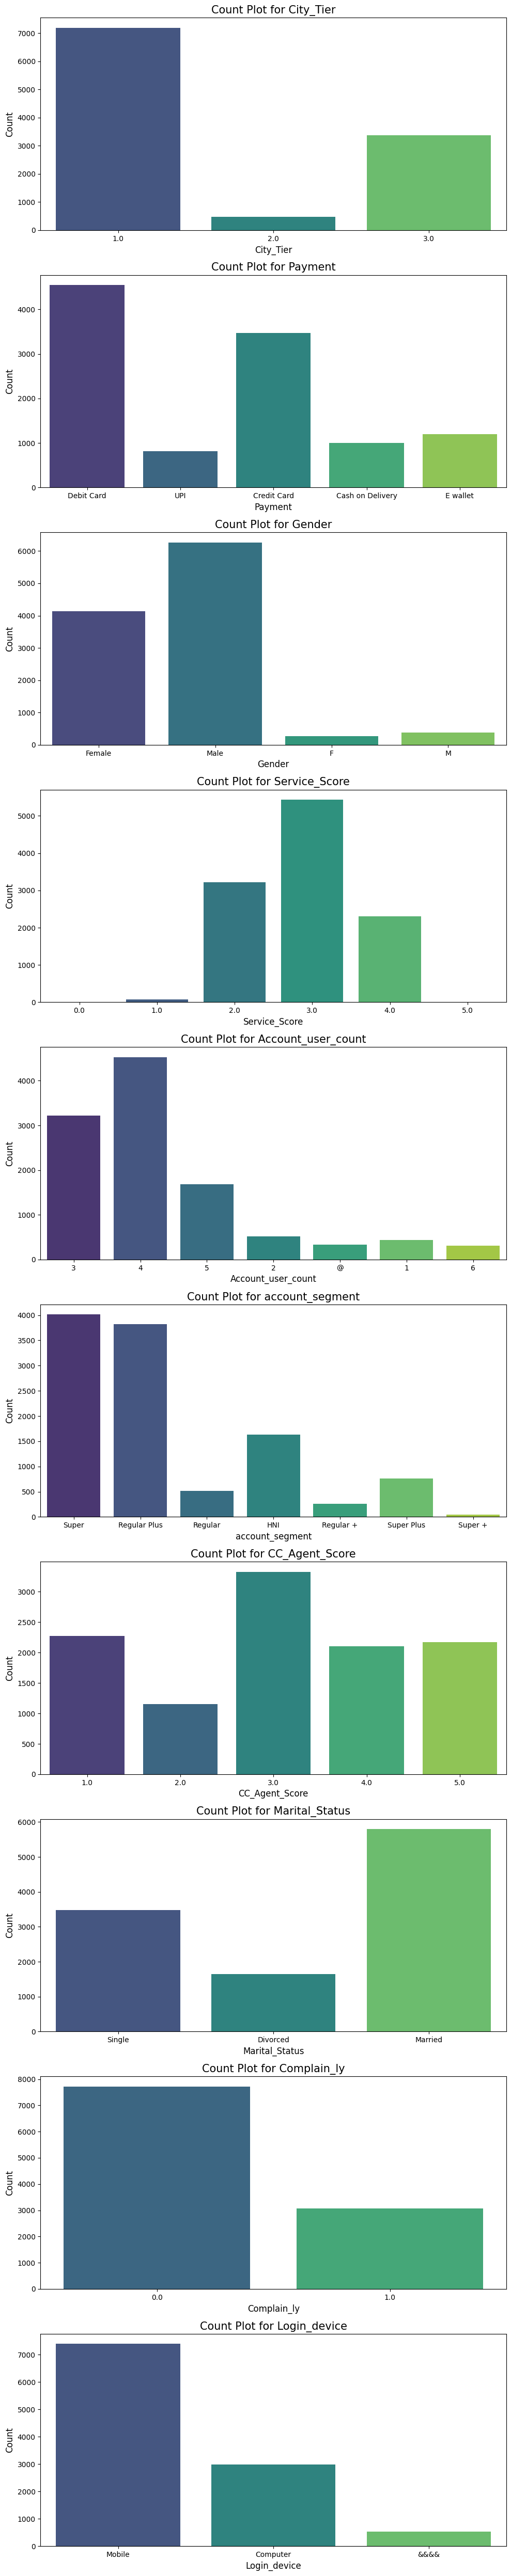

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'churn' is your DataFrame
# Select only categorical columns
columns = ['City_Tier','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','Login_device']

# Set the size of the figure dynamically based on the number of columns
plt.figure(figsize=(10, len(columns) * 5))

# Define a colorful palette
palette = sns.color_palette('viridis', as_cmap=True)

# Generate a count plot for each categorical column
for i, column in enumerate(columns):
    plt.subplot(len(columns), 1, i + 1)
    sns.countplot(x=churn[column], palette='viridis')
    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


# Bi-Variate and multi variate analysis

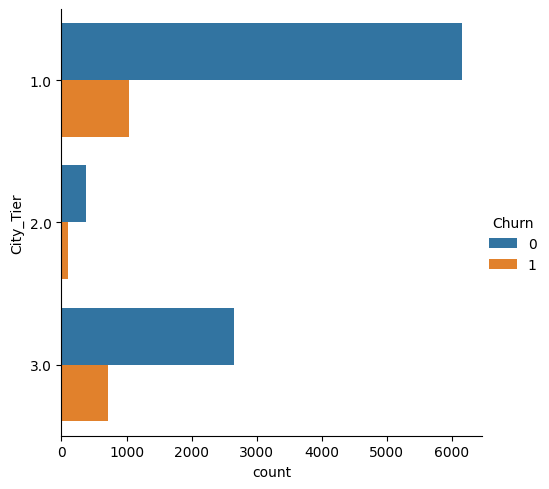

In [23]:
sns.catplot(y="City_Tier", hue="Churn", kind="count", data=churn)

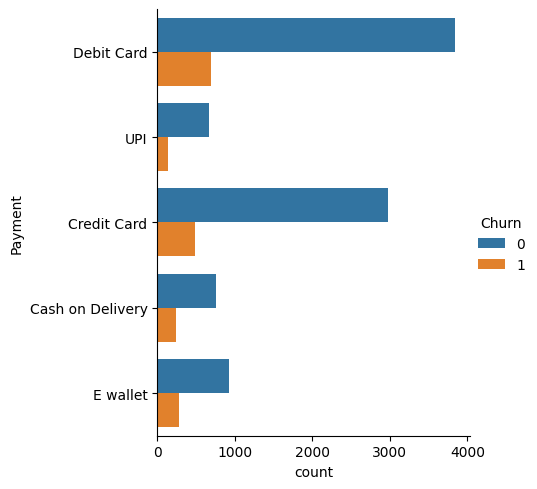

In [24]:
sns.catplot(y="Payment", hue="Churn", kind="count", data=churn)

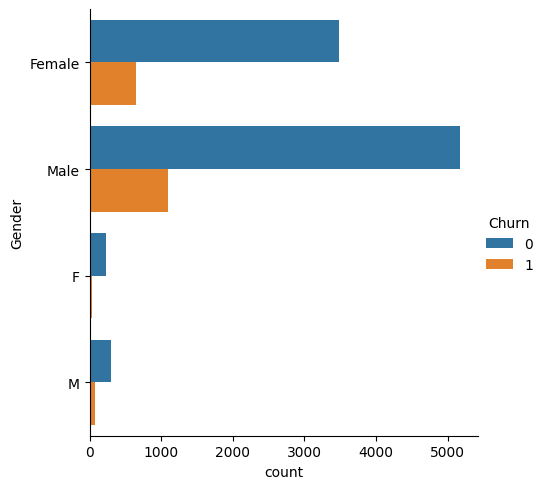

In [25]:
sns.catplot(y="Gender", hue="Churn", kind="count", data=churn)

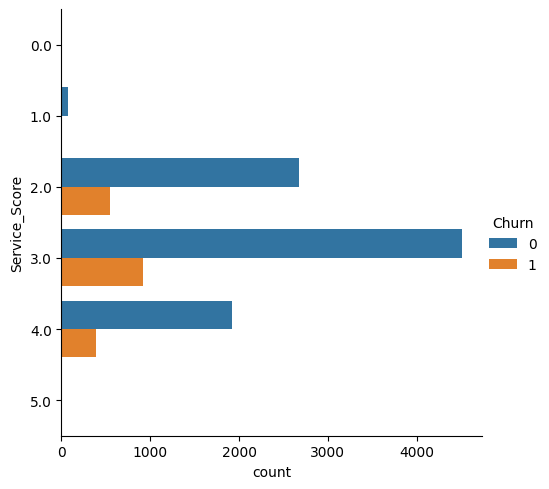

In [26]:
sns.catplot(y="Service_Score", hue="Churn", kind="count", data=churn)

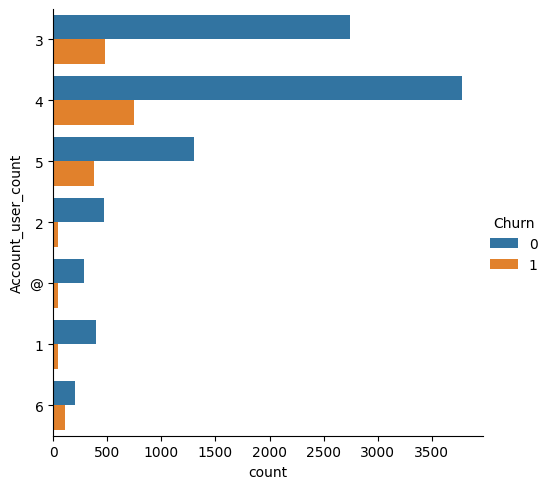

In [27]:
sns.catplot(y="Account_user_count", hue="Churn", kind="count", data=churn)

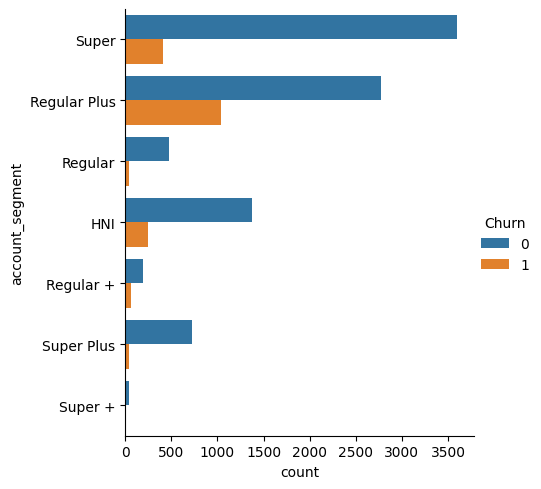

In [28]:
sns.catplot(y="account_segment", hue="Churn", kind="count", data=churn)

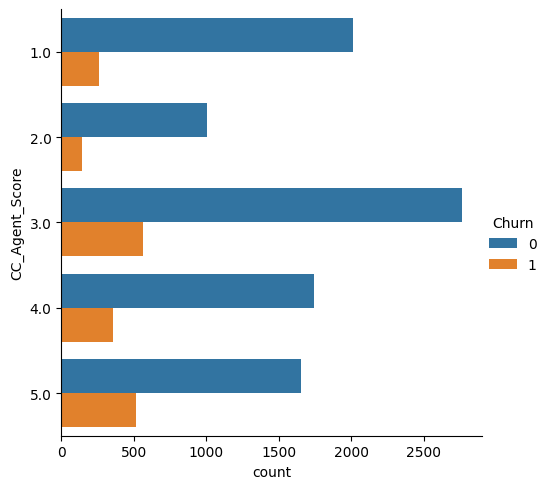

In [29]:
sns.catplot(y="CC_Agent_Score", hue="Churn", kind="count", data=churn)

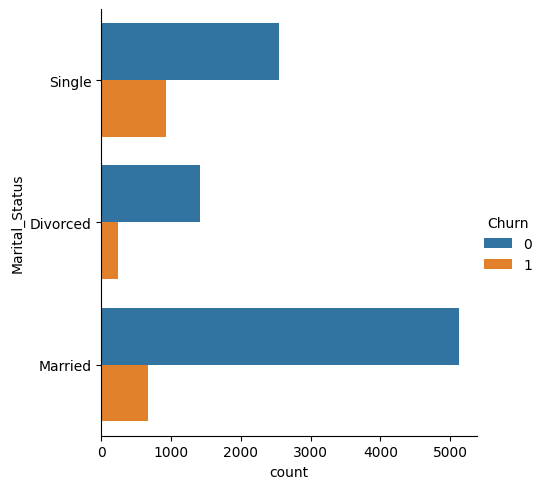

In [30]:
sns.catplot(y="Marital_Status", hue="Churn", kind="count", data=churn)

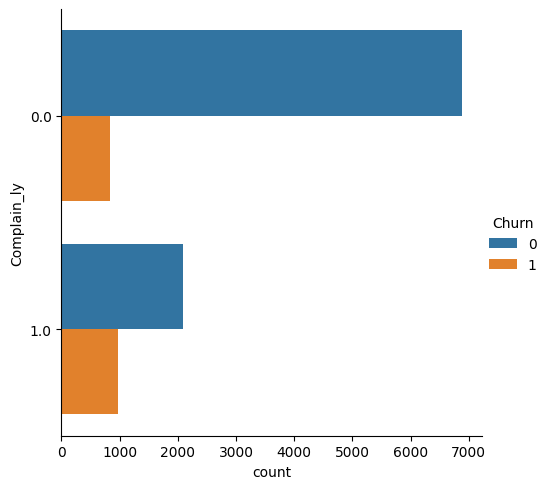

In [31]:
sns.catplot(y="Complain_ly", hue="Churn", kind="count", data=churn)

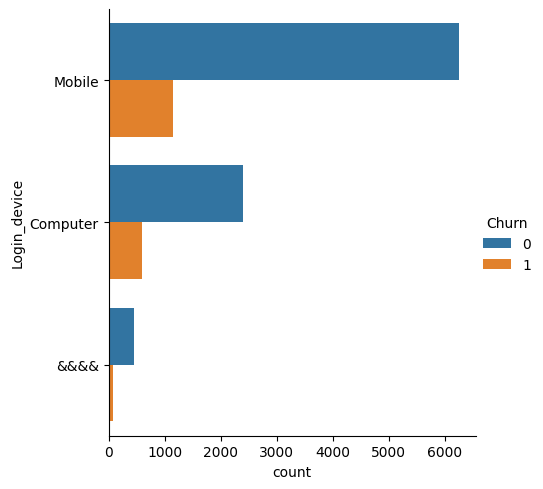

In [32]:
sns.catplot(y="Login_device", hue="Churn", kind="count", data=churn)

In [33]:
# #the pair plot:-
# sns.pairplot(data = churn)
# plt.show()

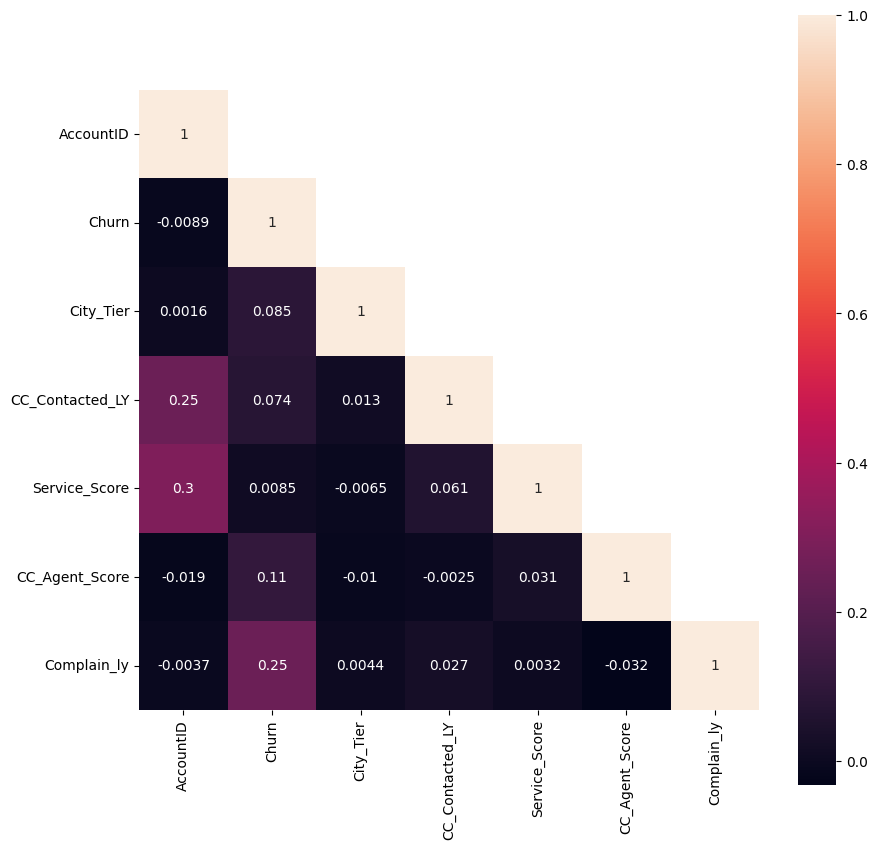

In [34]:
# plotting heatmap of correlation
cor = numeric_churn.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()

In [35]:
# checking data distribution of categorical object data types
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  37
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
26     122
27     131
99     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  815
Cash on Delivery    1000
E wallet            1204
Credit Card         3474
Debit Card          4542
Name: count, dtype: int64


GENDER :  4
Gender
F          270
M          376
Female    4129
Male      6261
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     312
@     332
1     439
2     517
5    1680
3    3226
4    4526
Name: count, dtype: int64


ACCOUNT_SEGMENT :  7
account_segment
Super +           47
Regular +        262
Regular          513
Super Plus       765
HN

In [36]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11144 non-null  int64  
 1   Churn                    11144 non-null  int64  
 2   Tenure                   11042 non-null  object 
 3   City_Tier                11032 non-null  float64
 4   CC_Contacted_LY          11042 non-null  float64
 5   Payment                  11035 non-null  object 
 6   Gender                   11036 non-null  object 
 7   Service_Score            11046 non-null  float64
 8   Account_user_count       11032 non-null  object 
 9   account_segment          11047 non-null  object 
 10  CC_Agent_Score           11028 non-null  float64
 11  Marital_Status           10932 non-null  object 
 12  rev_per_month            11042 non-null  object 
 13  Complain_ly              10787 non-null  float64
 14  rev_growth_yoy           11

In [37]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [38]:
churn["Tenure"].unique()

array([4, 0, 2, 13, 11, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3,
       29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50, 60, 31,
       51, 61], dtype=object)

In [39]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [40]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                      object
City_Tier                  float64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating Bad data

In [41]:
# Treating the veriable "tenure"

In [42]:
churn["Tenure"].unique()

array([4, 0, 2, 13, 11, 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1, 23, 3,
       29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50, 60, 31,
       51, 61], dtype=object)

In [43]:
churn['Tenure'] = churn['Tenure'].replace('#',np.NaN)

In [44]:
churn['Tenure'] = churn['Tenure'].astype('Int64')

In [45]:
churn["Tenure"].unique()

<IntegerArray>
[   4,    0,    2,   13,   11,    9,   99,   19,   20,   14,    8,   26,   18,
    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,   10,
   15,   22, <NA>,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [46]:
churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())

In [47]:
churn["Tenure"].unique()

<IntegerArray>
[ 4,  0,  2, 13, 11,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,  1, 23,  3,
 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60, 31, 51, 61]
Length: 37, dtype: Int64

In [48]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "City_Tier"

In [49]:
churn["City_Tier"].unique()

array([ 3.,  1., nan,  2.])

In [50]:
churn['City_Tier'] = churn['City_Tier'].fillna(churn['City_Tier'].mode()[0])

In [51]:
churn["City_Tier"].unique()

array([3., 1., 2.])

In [52]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [53]:
churn['City_Tier'] = churn['City_Tier'].astype('Int64')

In [54]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY            float64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "CC_Contacted_LY"

In [55]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  nan,  34.,   5.,   4., 126.,
         7.,  36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43.,
       129.])

In [56]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].fillna(churn['CC_Contacted_LY'].median())

In [57]:
churn["CC_Contacted_LY"].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  10.,  25.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  32.,  21.,  34.,   5.,   4., 126.,   7.,
        36., 127.,  42.,  38.,  37.,  39.,  40.,  41., 132.,  43., 129.])

In [58]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [59]:
churn['CC_Contacted_LY'] = churn['CC_Contacted_LY'].astype('Int64')

In [60]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                     object
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "Payment"

In [61]:
churn["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet',
       nan], dtype=object)

In [62]:
churn['Payment'] = churn['Payment'].fillna(churn['Payment'].mode()[0])

In [63]:
churn['Payment'] = churn['Payment'].replace('Debit Card','1')
churn['Payment'] = churn['Payment'].replace('UPI','2')
churn['Payment'] = churn['Payment'].replace('Credit Card','3')
churn['Payment'] = churn['Payment'].replace('Cash on Delivery','4')
churn['Payment'] = churn['Payment'].replace('E wallet','5')

In [64]:
churn["Payment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [65]:
churn['Payment'] = churn['Payment'].astype('float64')

In [66]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                      object
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

In [67]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "Gender"

In [68]:
churn["Gender"].unique()

array(['Female', 'Male', 'F', nan, 'M'], dtype=object)

In [69]:
churn['Gender'] = churn['Gender'].replace('Female','1')
churn['Gender'] = churn['Gender'].replace('F','1')
churn['Gender'] = churn['Gender'].replace('Male','2')
churn['Gender'] = churn['Gender'].replace('M','2')

In [70]:
churn["Gender"].unique()

array(['1', '2', nan], dtype=object)

In [71]:
churn['Gender'] = churn['Gender'].fillna(churn['Gender'].mode()[0])

In [72]:
churn["Gender"].unique()

array(['1', '2'], dtype=object)

In [73]:
churn['Gender'] = churn['Gender'].astype('float64')

In [74]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

### Treating the variable "Service_Score"

In [75]:
churn["Service_Score"].unique()

array([ 3.,  2.,  1., nan,  0.,  4.,  5.])

In [76]:
churn['Service_Score'] = churn['Service_Score'].fillna(churn['Service_Score'].mode()[0])

In [77]:
churn["Service_Score"].unique()

array([3., 2., 1., 0., 4., 5.])

In [78]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [79]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count          object
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Treating the variable "Account_user_count"

In [80]:
churn["Account_user_count"].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [81]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@',np.NaN)

In [82]:
churn["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [83]:
churn['Account_user_count'] = churn['Account_user_count'].fillna(churn['Account_user_count'].median())

In [84]:
churn["Account_user_count"].unique()

array([3., 4., 5., 2., 1., 6.])

In [85]:
churn['Account_user_count'] = churn['Account_user_count'].astype('float64')

In [86]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [87]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment             object
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

### Tretaing the variable "account_segment"

In [88]:
churn["account_segment"].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', nan,
       'Super Plus', 'Super +'], dtype=object)

In [89]:
churn['account_segment'] = churn['account_segment'].replace('Super','1')
churn['account_segment'] = churn['account_segment'].replace('Regular Plus','2')
churn['account_segment'] = churn['account_segment'].replace('Regular +','2')
churn['account_segment'] = churn['account_segment'].replace('Regular','3')
churn['account_segment'] = churn['account_segment'].replace('HNI','4')
churn['account_segment'] = churn['account_segment'].replace('Super Plus','5')
churn['account_segment'] = churn['account_segment'].replace('Super +','5')

In [90]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', nan, '5'], dtype=object)

In [91]:
churn['account_segment'] = churn['account_segment'].fillna(churn['account_segment'].mode()[0])

In [92]:
churn["account_segment"].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [93]:
churn['account_segment'] = churn['account_segment'].astype('float64')

In [94]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [95]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "CC_Agent_Score"

In [96]:
churn["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

In [97]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(churn['CC_Agent_Score'].mode()[0])

In [98]:
churn["CC_Agent_Score"].unique()

array([2., 3., 5., 4., 1.])

In [99]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [100]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status              object
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "Marital_Status"

In [101]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married', nan], dtype=object)

In [102]:
churn['Marital_Status'] = churn['Marital_Status'].fillna(churn['Marital_Status'].mode()[0])

In [103]:
churn["Marital_Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [104]:
churn['Marital_Status'] = churn['Marital_Status'].replace('Single','1')
churn['Marital_Status'] = churn['Marital_Status'].replace('Divorced','2')
churn['Marital_Status'] = churn['Marital_Status'].replace('Married','3')

In [105]:
churn['Marital_Status'] = churn['Marital_Status'].astype('float64')

In [106]:
churn["Marital_Status"].unique()

array([1., 2., 3.])

In [107]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [108]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month               object
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Tretaing the variable "rev_per_month"

In [109]:
churn["rev_per_month"].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, '+', 5, 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [110]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+',np.NaN)

In [111]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,  nan,   5.,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [112]:
churn['rev_per_month'] = churn['rev_per_month'].fillna(churn['rev_per_month'].median())

In [113]:
churn['rev_per_month'] = churn['rev_per_month'].astype('float64')

In [114]:
churn["rev_per_month"].unique()

array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5., 130.,
        19., 139., 102., 120., 138., 127., 123., 124., 116.,  21., 126.,
       134., 113., 114., 108., 140., 133., 129., 107., 118.,  11., 105.,
        20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,  13.,
        12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135., 111.,
       109., 100., 103.])

In [115]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [116]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "Complain_ly"

In [117]:
churn["Complain_ly"].unique()

array([ 1.,  0., nan])

In [118]:
churn['Complain_ly'] = churn['Complain_ly'].fillna(churn['Complain_ly'].mode()[0])

In [119]:
churn["Complain_ly"].unique()

array([1., 0.])

In [120]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [121]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy              object
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## treating the variable 'rev_growth_yoy'

In [122]:
churn["rev_growth_yoy"].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,
       '$', 4, 27, 28], dtype=object)

In [123]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$',np.NaN)

In [124]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [125]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].fillna(churn['rev_growth_yoy'].median())

In [126]:
churn["rev_growth_yoy"].unique()

array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26.,  4., 27., 28.])

In [127]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('float64')

In [128]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [129]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment     object
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## Treating the variable "coupon_used_for_payment"

In [130]:
churn["coupon_used_for_payment"].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [131]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$',np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*',np.NaN)

In [132]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [133]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].fillna(churn['coupon_used_for_payment'].median())

In [134]:
churn["coupon_used_for_payment"].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., 14., 16.])

In [135]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('float64')

In [136]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [137]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect        object
cashback                    object
Login_device                object
dtype: object

## tretaing the variable "Day_Since_CC_connect"

In [138]:
churn["Day_Since_CC_connect"].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [139]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$',np.NaN)

In [140]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [141]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].fillna(churn['Day_Since_CC_connect'].median())

In [142]:
churn["Day_Since_CC_connect"].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., 11., 10.,  9.,
       13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [143]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('float64')

In [144]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                   471
Login_device               221
dtype: int64

In [145]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                    object
Login_device                object
dtype: object

## Treating the variable "cashback"

In [146]:
churn["cashback"].unique()

array([159.93, 120.9, nan, ..., 227.36, 226.91, 191.42], dtype=object)

In [147]:
churn['cashback'] = churn['cashback'].replace('$',np.NaN)

In [148]:
churn['cashback'] = churn['cashback'].fillna(churn['cashback'].median())

In [149]:
churn["cashback"].unique()

array([159.93, 120.9 , 165.24, ..., 227.36, 226.91, 191.42])

In [150]:
churn['cashback'] = churn['cashback'].astype('float64')

In [151]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                    0
CC_Contacted_LY              0
Payment                      0
Gender                       0
Service_Score                0
Account_user_count           0
account_segment              0
CC_Agent_Score               0
Marital_Status               0
rev_per_month                0
Complain_ly                  0
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect         0
cashback                     0
Login_device               221
dtype: int64

In [152]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device                object
dtype: object

## Treating the variable "Login_device"

In [153]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [154]:
churn['Login_device'] = churn['Login_device'].replace('&&&&',np.NaN)

In [155]:
churn["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

In [156]:
churn['Login_device'] = churn['Login_device'].fillna(churn['Login_device'].mode()[0])

In [157]:
churn["Login_device"].unique()

array(['Mobile', 'Computer'], dtype=object)

In [158]:
churn['Login_device'] = churn['Login_device'].replace('Mobile','1')
churn['Login_device'] = churn['Login_device'].replace('Computer','2')

In [159]:
churn["Login_device"].unique()

array(['1', '2'], dtype=object)

In [160]:
churn['Login_device'] = churn['Login_device'].astype('float64')

In [161]:
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [162]:
churn.dtypes

AccountID                    int64
Churn                        int64
Tenure                       Int64
City_Tier                    Int64
CC_Contacted_LY              Int64
Payment                    float64
Gender                     float64
Service_Score              float64
Account_user_count         float64
account_segment            float64
CC_Agent_Score             float64
Marital_Status             float64
rev_per_month              float64
Complain_ly                float64
rev_growth_yoy             float64
coupon_used_for_payment    float64
Day_Since_CC_connect       float64
cashback                   float64
Login_device               float64
dtype: object

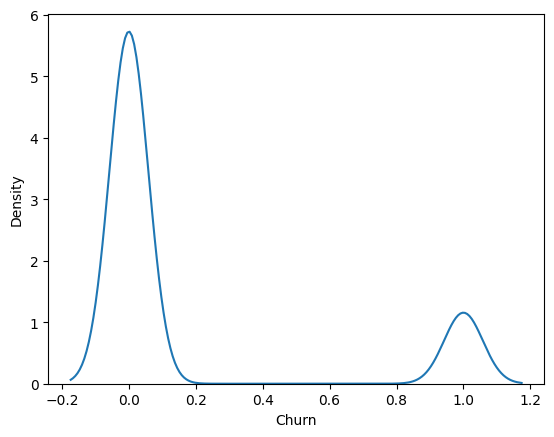

In [163]:
# checking if data is balanced
sns.kdeplot(data=churn, x="Churn");

In [164]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
AccountID                      0.0
Churn                        16.79
Tenure                        1.25
City_Tier                      0.0
CC_Contacted_LY               0.38
Payment                        0.0
Gender                         0.0
Service_Score                 0.12
Account_user_count            6.74
account_segment                0.0
CC_Agent_Score                 0.0
Marital_Status                 0.0
rev_per_month                 1.65
Complain_ly                    0.0
rev_growth_yoy                 0.0
coupon_used_for_payment       12.3
Day_Since_CC_connect          1.16
cashback                      8.65
Login_device                   0.0

### EDA after data cleaning

In [165]:
# checking info of data
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11144 non-null  int64  
 1   Churn                    11144 non-null  int64  
 2   Tenure                   11144 non-null  Int64  
 3   City_Tier                11144 non-null  Int64  
 4   CC_Contacted_LY          11144 non-null  Int64  
 5   Payment                  11144 non-null  float64
 6   Gender                   11144 non-null  float64
 7   Service_Score            11144 non-null  float64
 8   Account_user_count       11144 non-null  float64
 9   account_segment          11144 non-null  float64
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11144 non-null  float64
 12  rev_per_month            11144 non-null  float64
 13  Complain_ly              11144 non-null  float64
 14  rev_growth_yoy           11

In [166]:
# describing data
churn.describe().T

count          mean          std      min  \
AccountID                11144.0  25622.800431  3251.040643  20000.0   
Churn                    11144.0      0.167893     0.373788      0.0   
Tenure                   11144.0     11.006551    12.822148      0.0   
City_Tier                11144.0      1.647164     0.912616      1.0   
CC_Contacted_LY          11144.0     17.855169     8.820059      4.0   
Payment                  11144.0      2.397972     1.379195      1.0   
Gender                   11144.0      1.605258     0.488817      1.0   
Service_Score            11144.0      2.902459     0.722764      0.0   
Account_user_count       11144.0      3.706299     1.003079      1.0   
account_segment          11144.0      2.196967     1.268024      1.0   
CC_Agent_Score           11144.0      3.067211     1.372368      1.0   
Marital_Status           11144.0       2.22631      0.89467      1.0   
rev_per_month            11144.0      6.273959    11.544531      1.0   
Complain_ly              11144.0      0.275485     0.446778      0.0   
rev_growth_yoy           11144.0     16.197236      3.76345      4.0   
coupon_used_for_payment  11144.0      1.792265     1.971485      0.0   
Day_Since_CC_connect     11144.0       4.58444     3.652162      0.0   
cashback                 11144.0    195.123393   175.811082      0.0   
Login_device             11144.0      1.268037     0.442957      1.0   

                              25%      50%       75%      max  
AccountID                22802.75  25620.5  28442.25  31259.0  
Churn                         0.0      0.0       0.0      1.0  
Tenure                        2.0      9.0      16.0     99.0  
City_Tier                     1.0      1.0       3.0      3.0  
CC_Contacted_LY              11.0     16.0      23.0    132.0  
Payment                       1.0      3.0       3.0      5.0  
Gender                        1.0      2.0       2.0      2.0  
Service_Score                 2.0      3.0       3.0      5.0  
Account_user_count            3.0      4.0       4.0      6.0  
account_segment               1.0      2.0       3.0      5.0  
CC_Agent_Score                2.0      3.0       4.0      5.0  
Marital_Status                1.0      3.0       3.0      3.0  
rev_per_month                 3.0      5.0       7.0    140.0  
Complain_ly                   0.0      0.0       1.0      1.0  
rev_growth_yoy               13.0     15.0      19.0     28.0  
coupon_used_for_payment       1.0      1.0       2.0     16.0  
Day_Since_CC_connect          2.0      3.0       7.0     47.0  
cashback                   147.88   165.24    197.56   1997.0  
Login_device                  1.0      1.0       2.0      2.0

In [167]:
# describing data including object variable as well
churn.describe(include='all').T

count          mean          std      min  \
AccountID                11144.0  25622.800431  3251.040643  20000.0   
Churn                    11144.0      0.167893     0.373788      0.0   
Tenure                   11144.0     11.006551    12.822148      0.0   
City_Tier                11144.0      1.647164     0.912616      1.0   
CC_Contacted_LY          11144.0     17.855169     8.820059      4.0   
Payment                  11144.0      2.397972     1.379195      1.0   
Gender                   11144.0      1.605258     0.488817      1.0   
Service_Score            11144.0      2.902459     0.722764      0.0   
Account_user_count       11144.0      3.706299     1.003079      1.0   
account_segment          11144.0      2.196967     1.268024      1.0   
CC_Agent_Score           11144.0      3.067211     1.372368      1.0   
Marital_Status           11144.0       2.22631      0.89467      1.0   
rev_per_month            11144.0      6.273959    11.544531      1.0   
Complain_ly              11144.0      0.275485     0.446778      0.0   
rev_growth_yoy           11144.0     16.197236      3.76345      4.0   
coupon_used_for_payment  11144.0      1.792265     1.971485      0.0   
Day_Since_CC_connect     11144.0       4.58444     3.652162      0.0   
cashback                 11144.0    195.123393   175.811082      0.0   
Login_device             11144.0      1.268037     0.442957      1.0   

                              25%      50%       75%      max  
AccountID                22802.75  25620.5  28442.25  31259.0  
Churn                         0.0      0.0       0.0      1.0  
Tenure                        2.0      9.0      16.0     99.0  
City_Tier                     1.0      1.0       3.0      3.0  
CC_Contacted_LY              11.0     16.0      23.0    132.0  
Payment                       1.0      3.0       3.0      5.0  
Gender                        1.0      2.0       2.0      2.0  
Service_Score                 2.0      3.0       3.0      5.0  
Account_user_count            3.0      4.0       4.0      6.0  
account_segment               1.0      2.0       3.0      5.0  
CC_Agent_Score                2.0      3.0       4.0      5.0  
Marital_Status                1.0      3.0       3.0      3.0  
rev_per_month                 3.0      5.0       7.0    140.0  
Complain_ly                   0.0      0.0       1.0      1.0  
rev_growth_yoy               13.0     15.0      19.0     28.0  
coupon_used_for_payment       1.0      1.0       2.0     16.0  
Day_Since_CC_connect          2.0      3.0       7.0     47.0  
cashback                   147.88   165.24    197.56   1997.0  
Login_device                  1.0      1.0       2.0      2.0

In [168]:
# checking for null values
churn.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [169]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [churn.kurtosis(), churn.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


Kurtosis  Skewness
AccountID                   -1.20      0.00
Churn                        1.16      1.78
Tenure                      23.63      3.92
City_Tier                   -1.37      0.75
CC_Contacted_LY              8.40      1.44
Payment                     -1.02      0.46
Gender                      -1.81     -0.43
Service_Score               -0.65      0.00
Account_user_count           0.73     -0.43
account_segment             -0.37      0.92
CC_Agent_Score              -1.10     -0.14
Marital_Status              -1.59     -0.46
rev_per_month               93.01      9.40
Complain_ly                 -0.99      1.01
rev_growth_yoy              -0.22      0.75
coupon_used_for_payment      9.07      2.57
Day_Since_CC_connect         5.61      1.32
cashback                    84.05      8.93
Login_device                -0.90      1.05

In [170]:
# lets check the percentage of outlier in each column
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((churn < (Q1 - 1.5 * IQR)) | (churn > (Q3 + 1.5 * IQR))).sum()/churn.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

outlier %
AccountID                      0.0
Churn                        16.79
Tenure                        1.25
City_Tier                      0.0
CC_Contacted_LY               0.38
Payment                        0.0
Gender                         0.0
Service_Score                 0.12
Account_user_count            6.74
account_segment                0.0
CC_Agent_Score                 0.0
Marital_Status                 0.0
rev_per_month                 1.65
Complain_ly                    0.0
rev_growth_yoy                 0.0
coupon_used_for_payment       12.3
Day_Since_CC_connect          1.16
cashback                      8.65
Login_device                   0.0

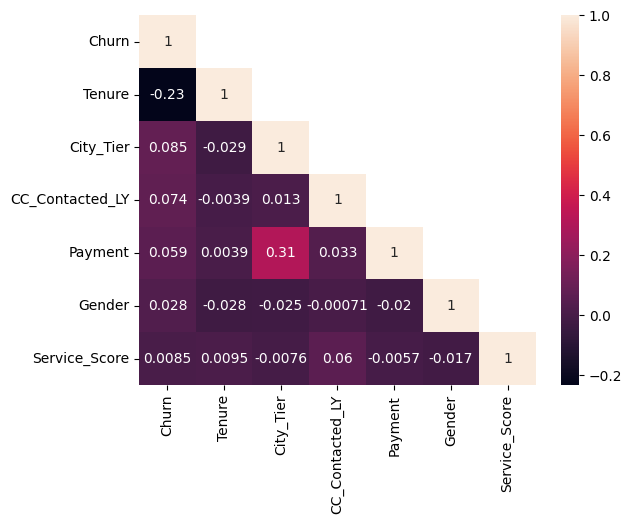

In [171]:
sns.heatmap(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score']].corr(),+1));

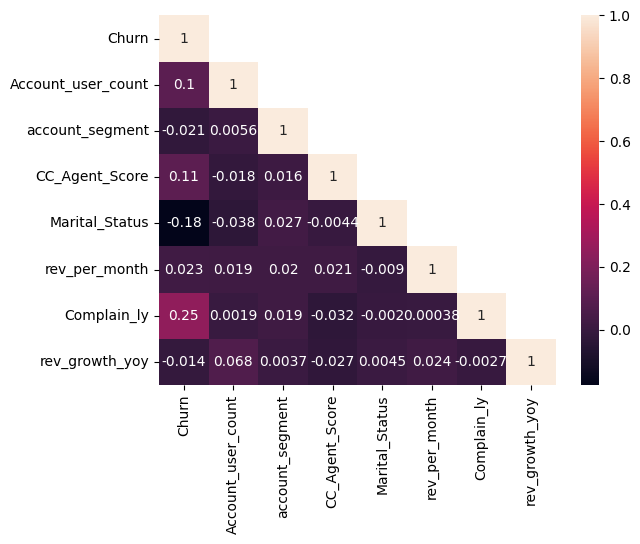

In [172]:
sns.heatmap(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),
            annot=True,mask=np.triu(churn[['Churn','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy']].corr(),+1));

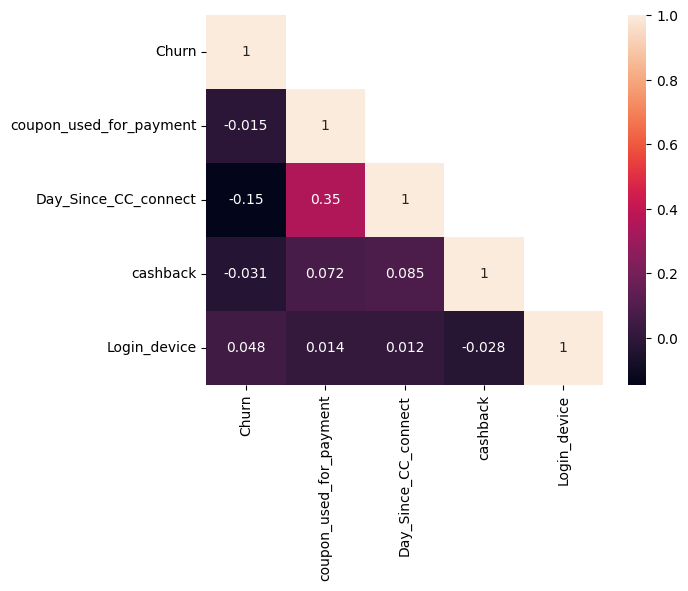

In [173]:
sns.heatmap(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),
            annot=True,mask=np.triu(churn[['Churn','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']].corr(),+1));

## scaling data and outlier treatment

In [174]:
churn['Payment'] = churn['Payment'].astype('int64')
churn['Gender'] = churn['Gender'].astype('int64')
churn['Service_Score'] = churn['Service_Score'].astype('int64')
churn['Account_user_count'] = churn['Account_user_count'].astype('int64')
churn['account_segment'] = churn['account_segment'].astype('int64')
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype('int64')
churn['rev_per_month'] = churn['rev_per_month'].astype('int64')
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].astype('int64')
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].astype('int64')
churn['cashback'] = churn['cashback'].astype('int64')
churn['Marital_Status'] = churn['Marital_Status'].astype('int64')
churn['Complain_ly'] = churn['Complain_ly'].astype('int64')
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].astype('int64')
churn['Login_device'] = churn['Login_device'].astype('int64')

In [175]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   AccountID                11144 non-null  int64
 1   Churn                    11144 non-null  int64
 2   Tenure                   11144 non-null  Int64
 3   City_Tier                11144 non-null  Int64
 4   CC_Contacted_LY          11144 non-null  Int64
 5   Payment                  11144 non-null  int64
 6   Gender                   11144 non-null  int64
 7   Service_Score            11144 non-null  int64
 8   Account_user_count       11144 non-null  int64
 9   account_segment          11144 non-null  int64
 10  CC_Agent_Score           11144 non-null  int64
 11  Marital_Status           11144 non-null  int64
 12  rev_per_month            11144 non-null  int64
 13  Complain_ly              11144 non-null  int64
 14  rev_growth_yoy           11144 non-null  int64
 15  coupon_

### Visualization before outlier treatment

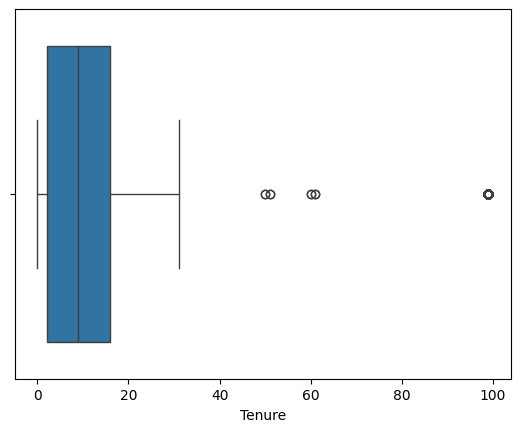

In [176]:
sns.boxplot(x="Tenure", data = churn);

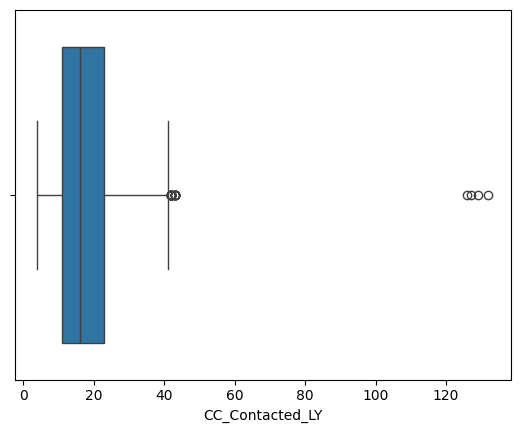

In [177]:
sns.boxplot(x="CC_Contacted_LY", data = churn);

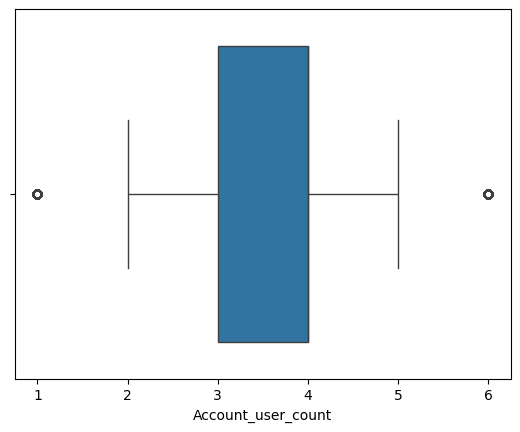

In [178]:
sns.boxplot(x="Account_user_count", data = churn);

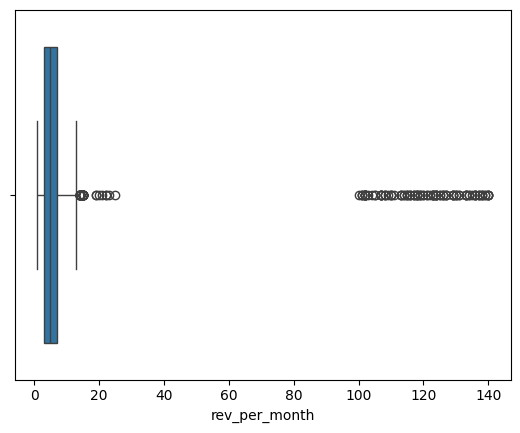

In [179]:
sns.boxplot(x="rev_per_month", data = churn);

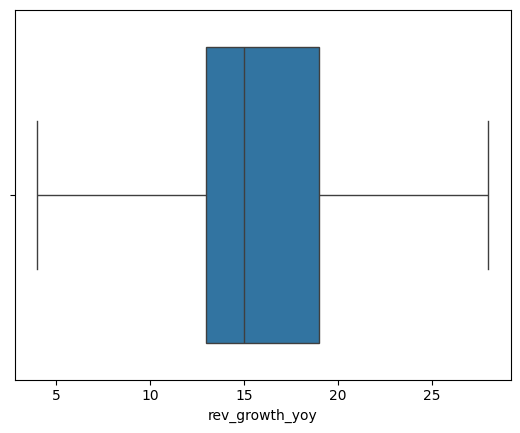

In [180]:
sns.boxplot(x="rev_growth_yoy", data = churn);

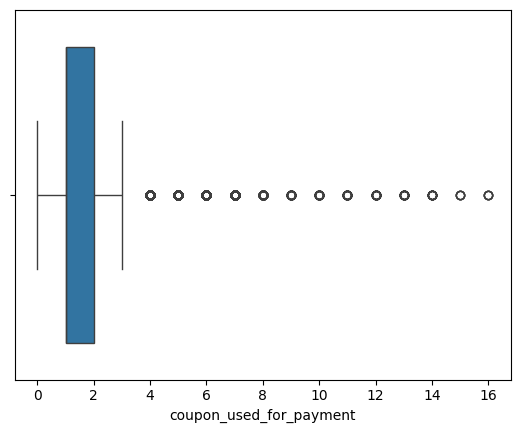

In [181]:
sns.boxplot(x="coupon_used_for_payment", data = churn);

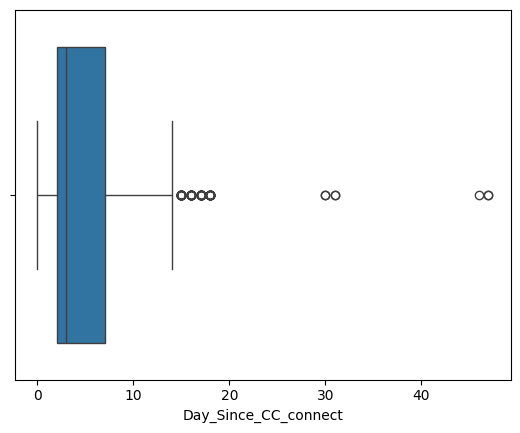

In [182]:
sns.boxplot(x="Day_Since_CC_connect", data = churn);

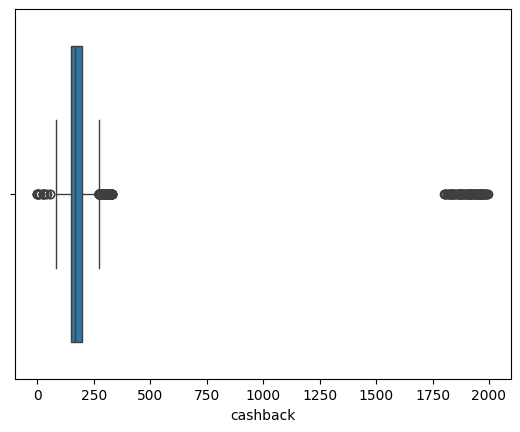

In [183]:
sns.boxplot(x="cashback", data = churn);

In [184]:
#treating outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range   

In [185]:
lw,up=remove_outlier(churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']>up,up,churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']<lw,lw,churn['Tenure'])

lw,up=remove_outlier(churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']>up,up,churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']<lw,lw,churn['CC_Contacted_LY'])

lw,up=remove_outlier(churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']>up,up,churn['Account_user_count'])
churn['Account_user_count']=np.where(churn['Account_user_count']<lw,lw,churn['Account_user_count'])

lw,up=remove_outlier(churn['cashback'])
churn['cashback']=np.where(churn['cashback']>up,up,churn['cashback'])
churn['cashback']=np.where(churn['cashback']<lw,lw,churn['cashback'])

lw,up=remove_outlier(churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']>up,up,churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']<lw,lw,churn['rev_per_month'])

lw,up=remove_outlier(churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']>up,up,churn['Day_Since_CC_connect'])
churn['Day_Since_CC_connect']=np.where(churn['Day_Since_CC_connect']<lw,lw,churn['Day_Since_CC_connect'])

lw,up=remove_outlier(churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']>up,up,churn['coupon_used_for_payment'])
churn['coupon_used_for_payment']=np.where(churn['coupon_used_for_payment']<lw,lw,churn['coupon_used_for_payment'])

lw,up=remove_outlier(churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']>up,up,churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']<lw,lw,churn['rev_growth_yoy'])


### Visualization after treating outliers

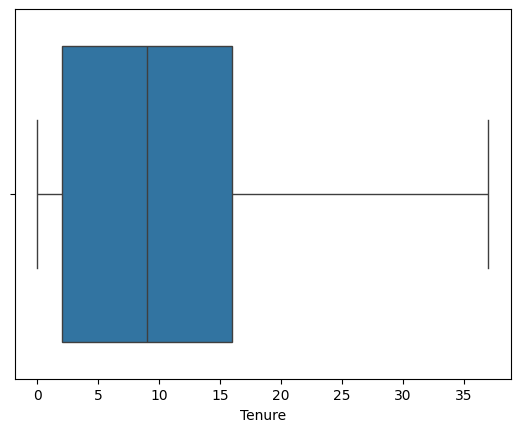

In [186]:
sns.boxplot(x="Tenure", data = churn);

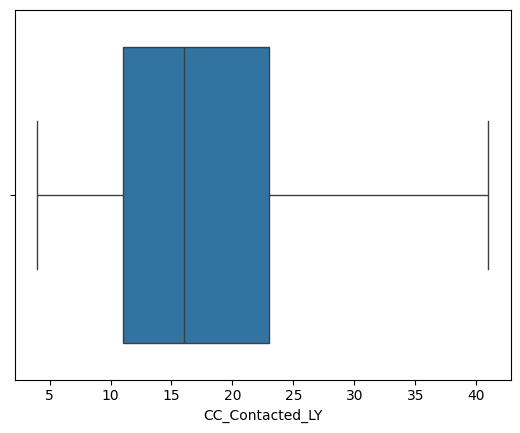

In [187]:
sns.boxplot(x="CC_Contacted_LY", data = churn);

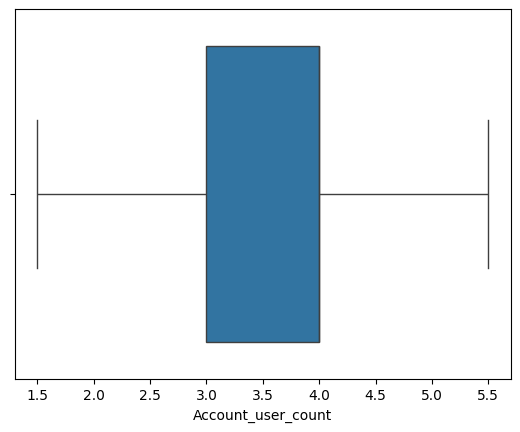

In [188]:
sns.boxplot(x="Account_user_count", data = churn);

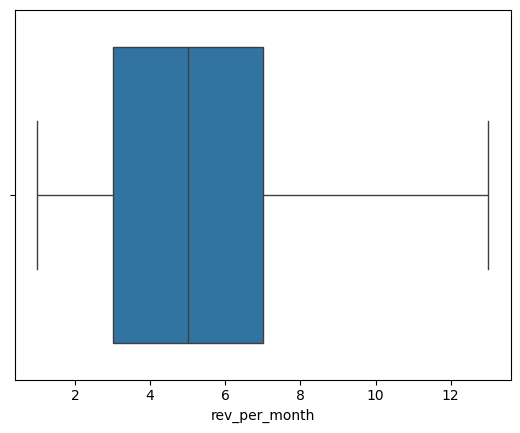

In [189]:
sns.boxplot(x="rev_per_month", data = churn);

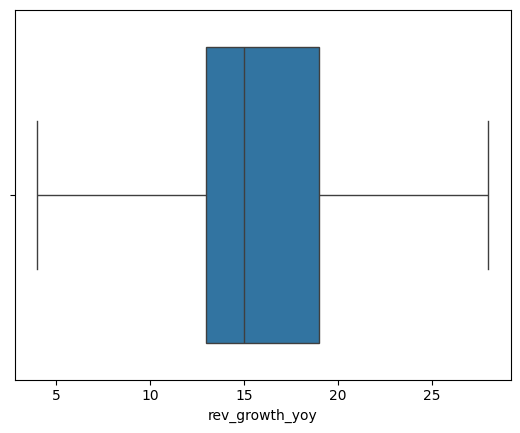

In [190]:
sns.boxplot(x="rev_growth_yoy", data = churn);

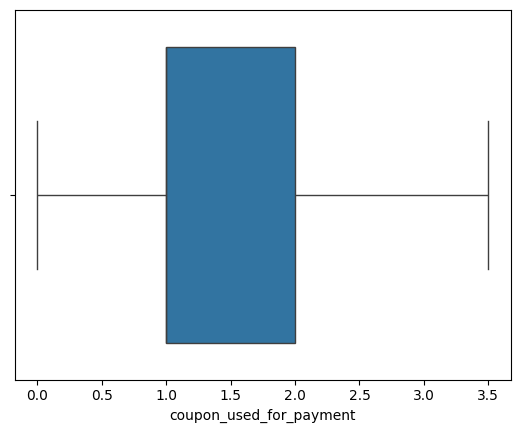

In [191]:
sns.boxplot(x="coupon_used_for_payment", data = churn);

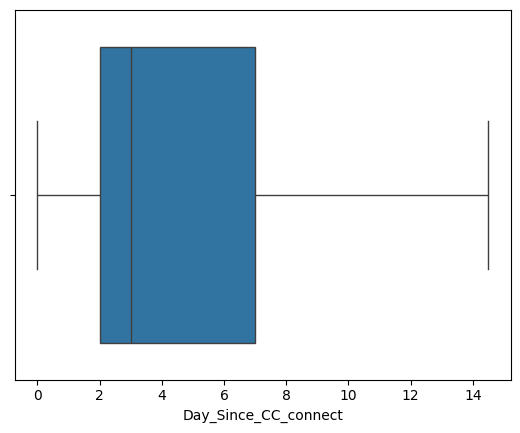

In [192]:
sns.boxplot(x="Day_Since_CC_connect", data = churn);

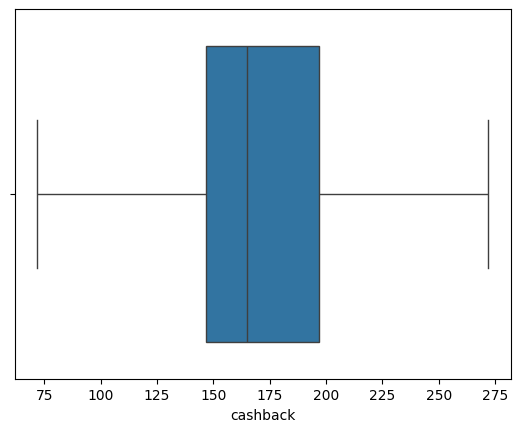

In [193]:
sns.boxplot(x="cashback", data = churn);

### Scaling data

In [194]:
from sklearn.preprocessing import MinMaxScaler

churn['Scaled_Churn'] = MinMaxScaler().fit_transform(churn[['Churn']])
churn['Scaled_Tenure'] = MinMaxScaler().fit_transform(churn[['Tenure']])
churn['Scaled_City_Tier'] = MinMaxScaler().fit_transform(churn[['City_Tier']])
churn['Scaled_CC_Contacted_LY'] = MinMaxScaler().fit_transform(churn[['CC_Contacted_LY']])
churn['Scaled_Payment'] = MinMaxScaler().fit_transform(churn[['Payment']])
churn['Scaled_Gender'] = MinMaxScaler().fit_transform(churn[['Gender']])
churn['Scaled_Service_Score'] = MinMaxScaler().fit_transform(churn[['Service_Score']])
churn['Scaled_Account_user_count'] = MinMaxScaler().fit_transform(churn[['Account_user_count']])
churn['Scaled_account_segment'] = MinMaxScaler().fit_transform(churn[['account_segment']])
churn['Scaled_CC_Agent_Score'] = MinMaxScaler().fit_transform(churn[['CC_Agent_Score']])
churn['Scaled_Marital_Status'] = MinMaxScaler().fit_transform(churn[['Marital_Status']])
churn['Scaled_rev_per_month'] = MinMaxScaler().fit_transform(churn[['rev_per_month']])
churn['Scaled_Complain_ly'] = MinMaxScaler().fit_transform(churn[['Complain_ly']])
churn['Scaled_rev_growth_yoy'] = MinMaxScaler().fit_transform(churn[['rev_growth_yoy']])
churn['Scaled_coupon_used_for_payment'] = MinMaxScaler().fit_transform(churn[['coupon_used_for_payment']])
churn['Scaled_Day_Since_CC_connect'] = MinMaxScaler().fit_transform(churn[['Day_Since_CC_connect']])
churn['Scaled_cashback'] = MinMaxScaler().fit_transform(churn[['cashback']])
churn['Scaled_Login_device'] = MinMaxScaler().fit_transform(churn[['Login_device']])

In [195]:
churn_scaled = pd.DataFrame({
'Churn': churn['Scaled_Churn'] ,    
'Tenure': churn['Scaled_Tenure'] ,    
'City_Tier': churn['Scaled_City_Tier'] ,    
'CC_Contacted_LY': churn['Scaled_CC_Contacted_LY'] ,    
'Payment': churn['Scaled_Payment'] ,    
'Gender': churn['Scaled_Gender'] ,    
'Service_Score': churn['Scaled_Service_Score'] ,    
'Account_user_count': churn['Scaled_Account_user_count'] ,    
'account_segment': churn['Scaled_account_segment'] ,    
'CC_Agent_Score': churn['Scaled_CC_Agent_Score'] ,    
'Marital_Status': churn['Scaled_Marital_Status'] ,    
'rev_per_month': churn['Scaled_rev_per_month'] ,    
'Complain_ly': churn['Scaled_Complain_ly'] ,    
'rev_growth_yoy': churn['Scaled_rev_growth_yoy'] ,    
'coupon_used_for_payment': churn['Scaled_coupon_used_for_payment'] ,    
'Day_Since_CC_connect': churn['Scaled_Day_Since_CC_connect'] ,
'cashback': churn['Scaled_cashback'] ,    
'Login_device': churn['Scaled_Login_device'] })
churn_scaled

Churn    Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
0        1.0  0.108108        1.0         0.054054     0.00     0.0   
1        1.0  0.000000        0.0         0.108108     0.25     1.0   
2        1.0  0.000000        0.0         0.702703     0.00     1.0   
3        1.0  0.000000        1.0         0.297297     0.00     1.0   
4        1.0  0.000000        0.0         0.216216     0.50     1.0   
...      ...       ...        ...              ...      ...     ...   
11255    0.0  0.270270        0.0         0.810811     0.50     1.0   
11256    0.0  0.351351        0.0         0.405405     0.50     1.0   
11257    0.0  0.027027        0.0         0.270270     0.00     1.0   
11258    0.0  0.621622        1.0         0.189189     0.50     1.0   
11259    0.0  0.216216        0.0         0.486486     0.50     1.0   

       Service_Score  Account_user_count  account_segment  CC_Agent_Score  \
0                0.6               0.375             0.00            0.25   
1                0.6               0.625             0.25            0.50   
2                0.4               0.625             0.25            0.50   
3                0.4               0.625             0.00            1.00   
4                0.4               0.375             0.25            1.00   
...              ...                 ...              ...             ...   
11255            0.6               0.125             0.00            0.00   
11256            0.6               0.875             0.75            1.00   
11257            0.6               0.125             0.00            0.75   
11258            0.8               0.875             0.00            0.75   
11259            0.6               0.125             0.00            0.50   

       Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0                 0.0       0.666667          1.0        0.291667   
1                 0.0       0.500000          1.0        0.458333   
2                 0.0       0.416667          1.0        0.416667   
3                 0.0       0.583333          0.0        0.791667   
4                 0.0       0.166667          0.0        0.291667   
...               ...            ...          ...             ...   
11255             1.0       0.666667          0.0        0.625000   
11256             1.0       0.500000          0.0        0.500000   
11257             1.0       0.500000          1.0        0.750000   
11258             1.0       0.500000          0.0        0.500000   
11259             1.0       0.333333          0.0        0.375000   

       coupon_used_for_payment  Day_Since_CC_connect  cashback  Login_device  
0                     0.285714              0.344828     0.435           0.0  
1                     0.000000              0.000000     0.240           0.0  
2                     0.000000              0.206897     0.465           0.0  
3                     0.000000              0.206897     0.310           0.0  
4                     0.285714              0.206897     0.285           0.0  
...                        ...                   ...       ...           ...  
11255                 0.285714              0.275862     0.405           1.0  
11256                 0.285714              0.551724     0.770           0.0  
11257                 0.285714              0.275862     0.595           0.0  
11258                 0.571429              0.620690     0.535           1.0  
11259                 0.571429              0.206897     0.515           0.0  

[11144 rows x 18 columns]

In [196]:
print(churn_scaled.std())

Churn                      0.373788
Tenure                     0.241463
City_Tier                  0.456308
CC_Contacted_LY            0.231537
Payment                    0.344799
Gender                     0.488817
Service_Score              0.144553
Account_user_count         0.230779
account_segment            0.317006
CC_Agent_Score             0.343092
Marital_Status             0.447335
rev_per_month              0.239944
Complain_ly                0.446778
rev_growth_yoy             0.156810
coupon_used_for_payment    0.315262
Day_Since_CC_connect       0.241009
cashback                   0.219019
Login_device               0.442957
dtype: float64


In [197]:
# # plotting sns plot
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# # pair plot to check on data distribution and co-linearity
# sns.pairplot(churn_scaled, hue = 'Churn', diag_kind='kde')  
# plt.show()

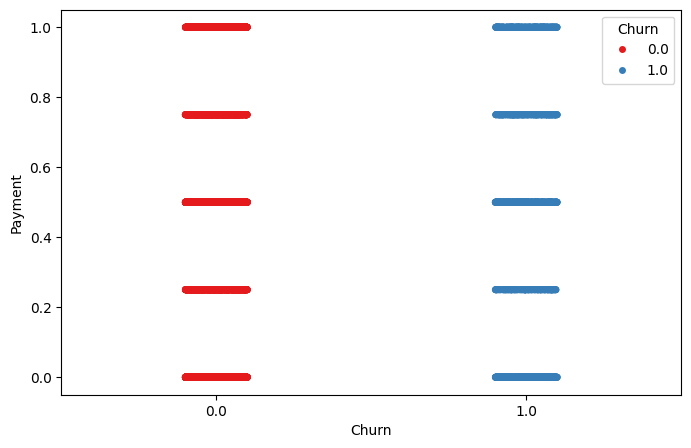

In [198]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Payment", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

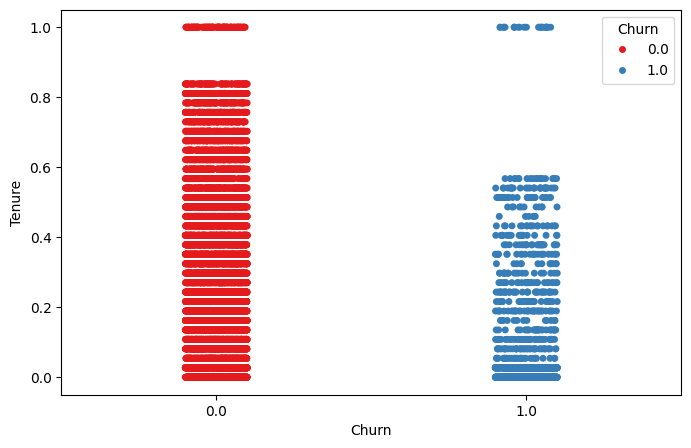

In [199]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Tenure", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

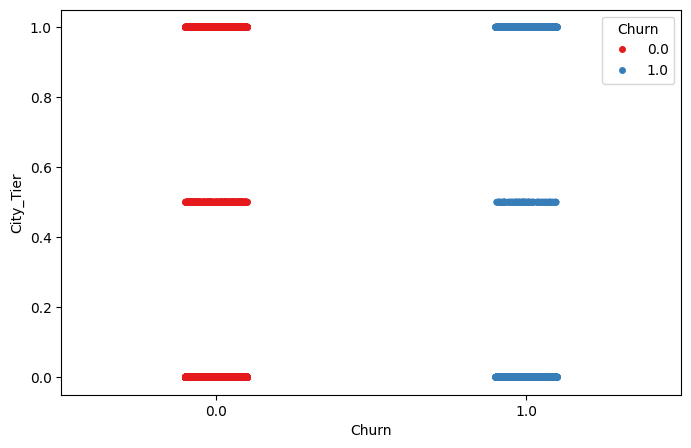

In [200]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="City_Tier", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

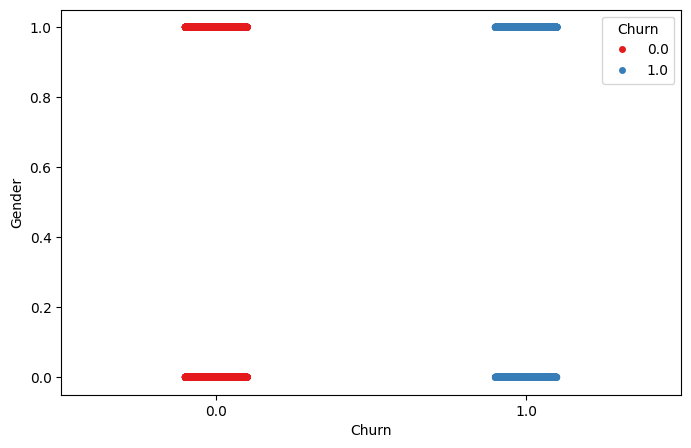

In [201]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Gender", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

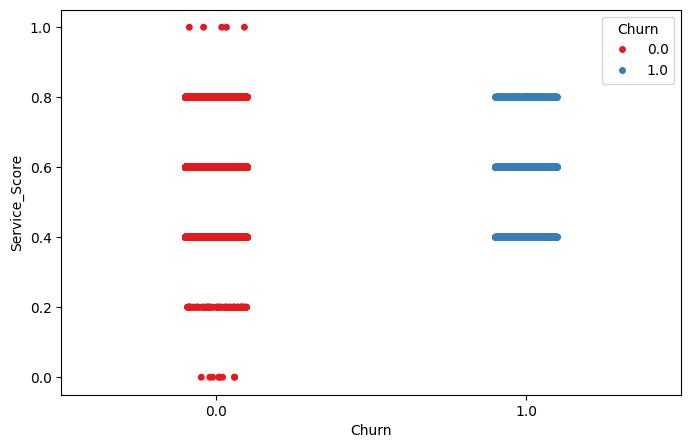

In [202]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Service_Score", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

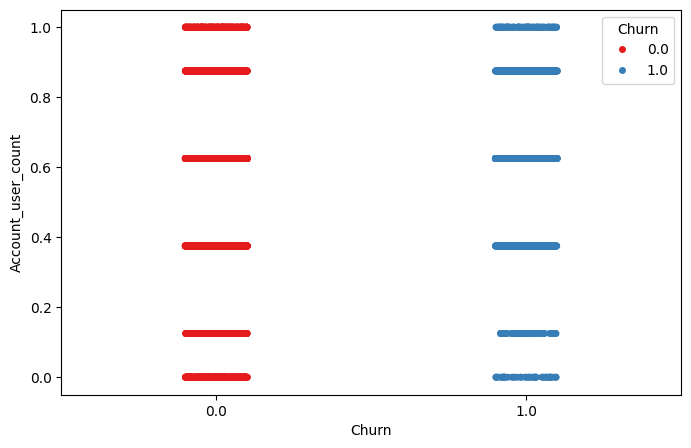

In [203]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Account_user_count", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

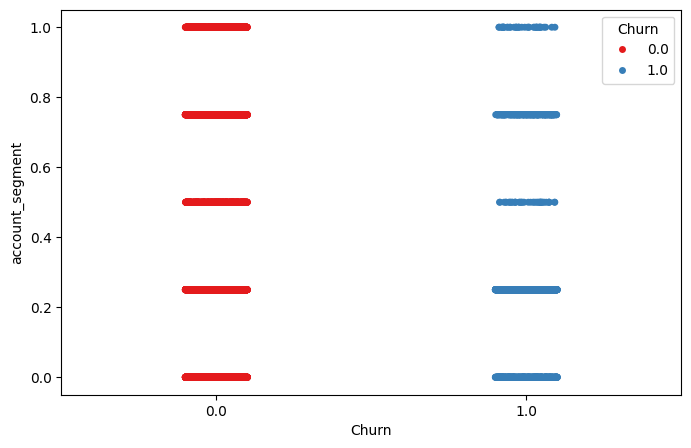

In [204]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="account_segment", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

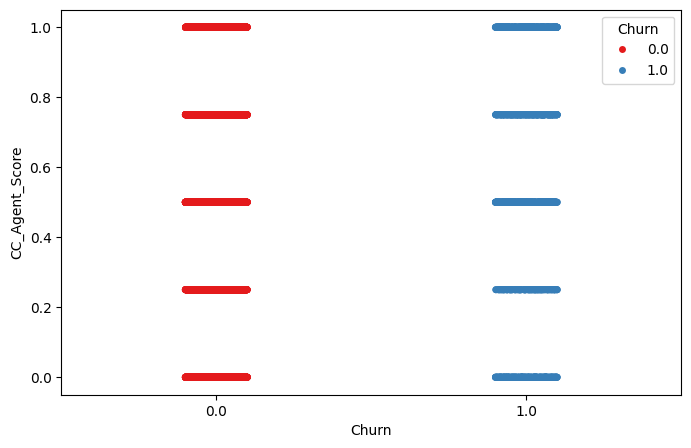

In [205]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="CC_Agent_Score", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

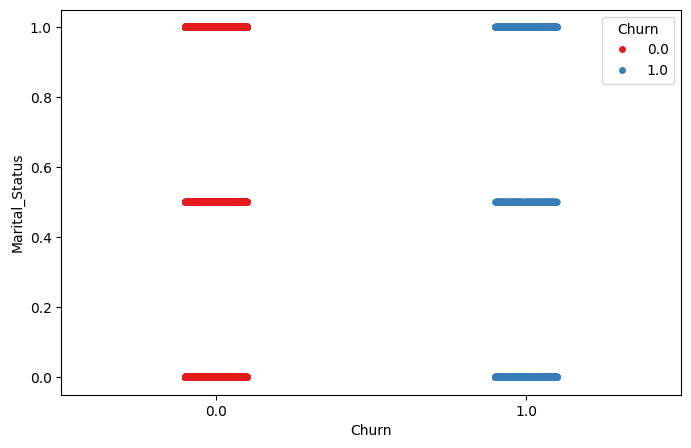

In [206]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Marital_Status", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

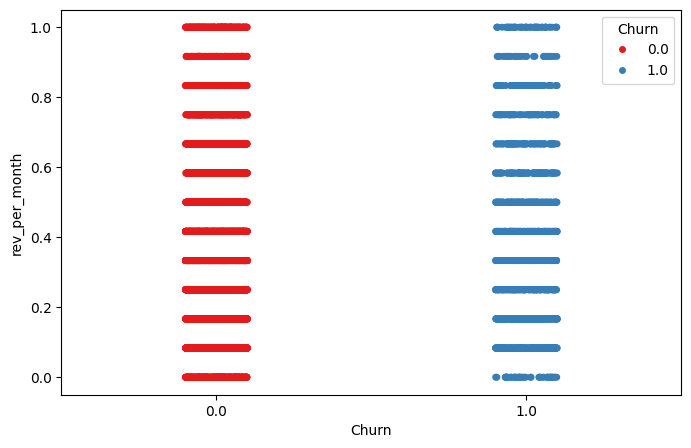

In [207]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="rev_per_month", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

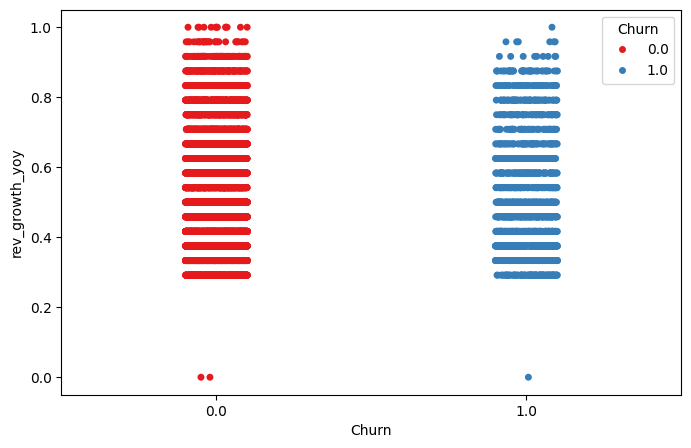

In [208]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="rev_growth_yoy", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

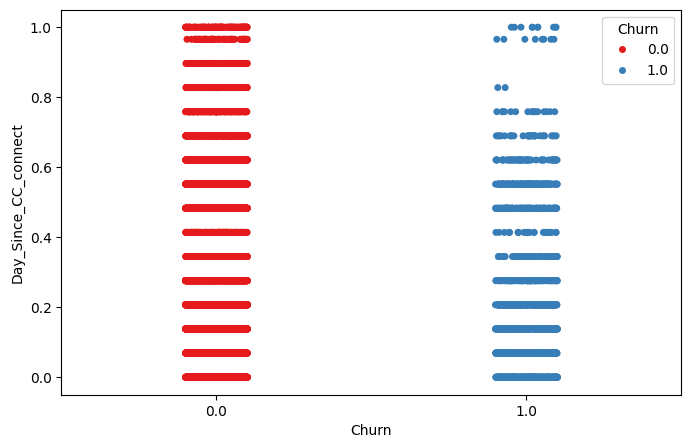

In [209]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Day_Since_CC_connect", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

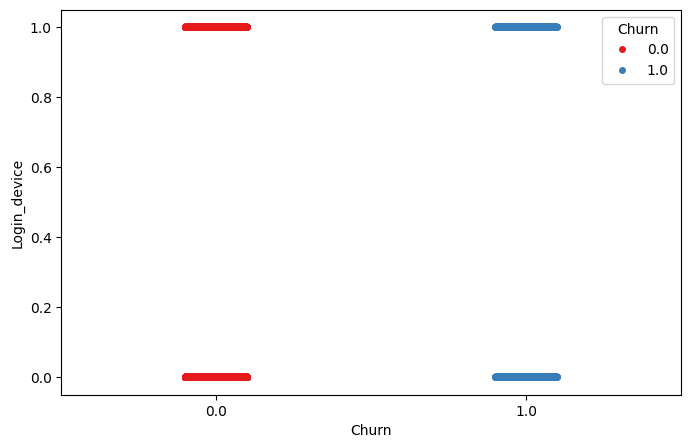

In [210]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Login_device", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

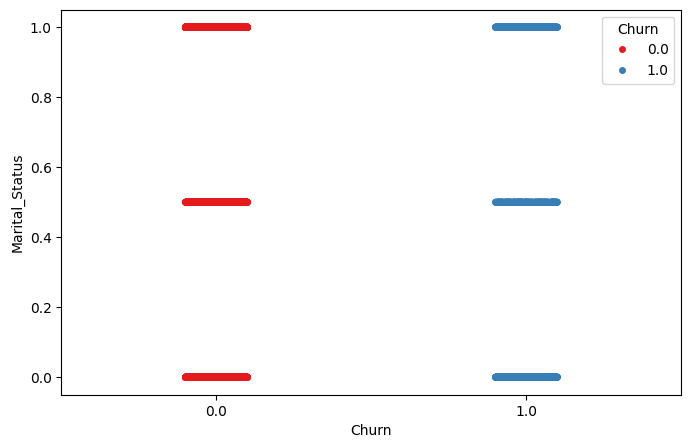

In [211]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Churn", y="Marital_Status", data=churn_scaled, jitter=True, hue="Churn", palette="Set1")
plt.show()

In [212]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11144 non-null  float64
 1   Tenure                   11144 non-null  float64
 2   City_Tier                11144 non-null  float64
 3   CC_Contacted_LY          11144 non-null  float64
 4   Payment                  11144 non-null  float64
 5   Gender                   11144 non-null  float64
 6   Service_Score            11144 non-null  float64
 7   Account_user_count       11144 non-null  float64
 8   account_segment          11144 non-null  float64
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11144 non-null  float64
 11  rev_per_month            11144 non-null  float64
 12  Complain_ly              11144 non-null  float64
 13  rev_growth_yoy           11144 non-null  float64
 14  coupon_used_for_payment  11

In [213]:
churn_scaled['Payment'] = churn_scaled['Payment'].astype('int64')
churn_scaled['Gender'] = churn_scaled['Gender'].astype('int64')
churn_scaled['Service_Score'] = churn_scaled['Service_Score'].astype('int64')
churn_scaled['Account_user_count'] = churn_scaled['Account_user_count'].astype('int64')
churn_scaled['account_segment'] = churn_scaled['account_segment'].astype('int64')
churn_scaled['CC_Agent_Score'] = churn_scaled['CC_Agent_Score'].astype('int64')
churn_scaled['rev_per_month'] = churn_scaled['rev_per_month'].astype('int64')
churn_scaled['coupon_used_for_payment'] = churn_scaled['coupon_used_for_payment'].astype('int64')
churn_scaled['Day_Since_CC_connect'] = churn_scaled['Day_Since_CC_connect'].astype('int64')
churn_scaled['cashback'] = churn_scaled['cashback'].astype('int64')
churn_scaled['Marital_Status'] = churn_scaled['Marital_Status'].astype('int64')
churn_scaled['Complain_ly'] = churn_scaled['Complain_ly'].astype('int64')
churn_scaled['rev_growth_yoy'] = churn_scaled['rev_growth_yoy'].astype('int64')
churn_scaled['Login_device'] = churn_scaled['Login_device'].astype('int64')
#churn_scaled['Churn'] = churn_scaled['Churn'].astype('int64')
churn_scaled['Tenure'] = churn_scaled['Tenure'].astype('int64')
churn_scaled['City_Tier'] = churn_scaled['City_Tier'].astype('int64')
churn_scaled['CC_Contacted_LY'] = churn_scaled['CC_Contacted_LY'].astype('int64')

In [214]:
churn_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11144 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11144 non-null  float64
 1   Tenure                   11144 non-null  int64  
 2   City_Tier                11144 non-null  int64  
 3   CC_Contacted_LY          11144 non-null  int64  
 4   Payment                  11144 non-null  int64  
 5   Gender                   11144 non-null  int64  
 6   Service_Score            11144 non-null  int64  
 7   Account_user_count       11144 non-null  int64  
 8   account_segment          11144 non-null  int64  
 9   CC_Agent_Score           11144 non-null  int64  
 10  Marital_Status           11144 non-null  int64  
 11  rev_per_month            11144 non-null  int64  
 12  Complain_ly              11144 non-null  int64  
 13  rev_growth_yoy           11144 non-null  int64  
 14  coupon_used_for_payment  11

## Splitting data into train and test data set

In [215]:
# splitting data into independent and dependent variables
X = churn_scaled.drop('Churn' , axis=1)

y = churn_scaled.pop("Churn")

In [216]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [217]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7800, 17)
X_test (3344, 17)
y_train (7800,)
y_test (3344,)


In [218]:
from numpy import where
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [219]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

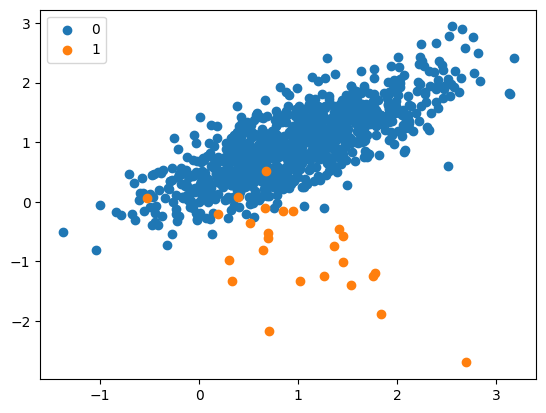

In [220]:
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## Performing SMOTE to balance data

In [221]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [222]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

### checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

In [223]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [224]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

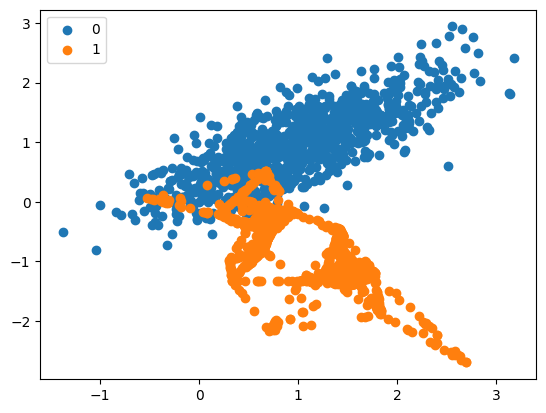

In [225]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [227]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(churn_scaled)
    wss.append(KM.inertia_)

In [228]:
wss

[18476.75789662594,
 16718.482494148462,
 15224.21583041925,
 13960.891164799728,
 12245.273177265153,
 12129.375840318611,
 11284.20788309519,
 10453.433698098099,
 9921.862813856194,
 9655.429365311535]

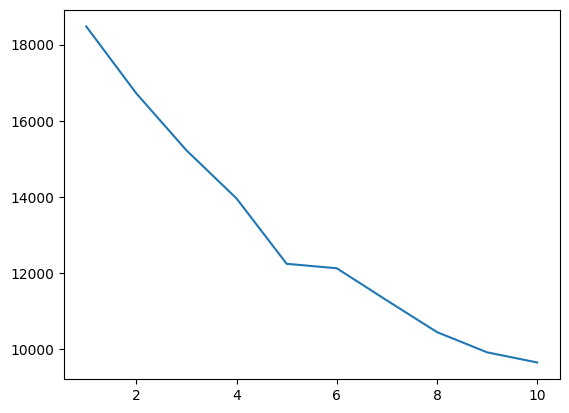

In [229]:
plt.plot(range(1,11), wss)

In [230]:
k_means = KMeans(n_clusters = 3)
k_means.fit(churn_scaled)
labels = k_means.labels_

In [231]:
churn_scaled["Clus_kmeans"] = labels
churn_scaled.head(5)

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  Service_Score  \
0       0          1                0        0       0              0   
1       0          0                0        0       1              0   
2       0          0                0        0       1              0   
3       0          1                0        0       1              0   
4       0          0                0        0       1              0   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0                   0                0               0               0   
1                   0                0               0               0   
2                   0                0               0               0   
3                   0                0               1               0   
4                   0                0               1               0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0              0            1               0                        0   
1              0            1               0                        0   
2              0            1               0                        0   
3              0            0               0                        0   
4              0            0               0                        0   

   Day_Since_CC_connect  cashback  Login_device  Clus_kmeans  
0                     0         0             0            2  
1                     0         0             0            0  
2                     0         0             0            0  
3                     0         0             0            1  
4                     0         0             0            0

In [232]:
churn_scaled.groupby(["Clus_kmeans"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                        
0              4262       4262             4262     4262    4262   
1              4753       4753             4753     4753    4753   
2              2129       2129             2129     2129    2129   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                     4262                4262             4262   
1                     4753                4753             4753   
2                     2129                2129             2129   

             CC_Agent_Score  Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                               
0                      4262            4262           4262         4262   
1                      4753            4753           4753         4753   
2                      2129            2129           2129         2129   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clus_kmeans                                                                  
0                      4262                     4262                  4262   
1                      4753                     4753                  4753   
2                      2129                     2129                  2129   

             cashback  Login_device  
Clus_kmeans                          
0                4262          4262  
1                4753          4753  
2                2129          2129

In [233]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7800 entries, 7732 to 237
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7800 non-null   int64
 1   City_Tier                7800 non-null   int64
 2   CC_Contacted_LY          7800 non-null   int64
 3   Payment                  7800 non-null   int64
 4   Gender                   7800 non-null   int64
 5   Service_Score            7800 non-null   int64
 6   Account_user_count       7800 non-null   int64
 7   account_segment          7800 non-null   int64
 8   CC_Agent_Score           7800 non-null   int64
 9   Marital_Status           7800 non-null   int64
 10  rev_per_month            7800 non-null   int64
 11  Complain_ly              7800 non-null   int64
 12  rev_growth_yoy           7800 non-null   int64
 13  coupon_used_for_payment  7800 non-null   int64
 14  Day_Since_CC_connect     7800 non-null   int64
 15  cashbac

In [234]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3344 entries, 9198 to 10948
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   3344 non-null   int64
 1   City_Tier                3344 non-null   int64
 2   CC_Contacted_LY          3344 non-null   int64
 3   Payment                  3344 non-null   int64
 4   Gender                   3344 non-null   int64
 5   Service_Score            3344 non-null   int64
 6   Account_user_count       3344 non-null   int64
 7   account_segment          3344 non-null   int64
 8   CC_Agent_Score           3344 non-null   int64
 9   Marital_Status           3344 non-null   int64
 10  rev_per_month            3344 non-null   int64
 11  Complain_ly              3344 non-null   int64
 12  rev_growth_yoy           3344 non-null   int64
 13  coupon_used_for_payment  3344 non-null   int64
 14  Day_Since_CC_connect     3344 non-null   int64
 15  cashb

In [235]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   12986 non-null  int64
 1   City_Tier                12986 non-null  int64
 2   CC_Contacted_LY          12986 non-null  int64
 3   Payment                  12986 non-null  int64
 4   Gender                   12986 non-null  int64
 5   Service_Score            12986 non-null  int64
 6   Account_user_count       12986 non-null  int64
 7   account_segment          12986 non-null  int64
 8   CC_Agent_Score           12986 non-null  int64
 9   Marital_Status           12986 non-null  int64
 10  rev_per_month            12986 non-null  int64
 11  Complain_ly              12986 non-null  int64
 12  rev_growth_yoy           12986 non-null  int64
 13  coupon_used_for_payment  12986 non-null  int64
 14  Day_Since_CC_connect     12986 non-null  int64
 15  ca

## Logistic Regression Model

In [236]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [237]:
# predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [238]:
#Accuracy - Training Data
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8415384615384616


In [239]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8373205741626795


In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lg)

Confusion Matrix for train dataset


array([[6388,  105],
       [1131,  176]], dtype=int64)

In [241]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lg)

Confusion Matrix for test dataset


array([[2736,   44],
       [ 500,   64]], dtype=int64)

In [242]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [243]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      6493
         1.0       0.63      0.13      0.22      1307

    accuracy                           0.84      7800
   macro avg       0.74      0.56      0.57      7800
weighted avg       0.81      0.84      0.80      7800



In [244]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2780
         1.0       0.59      0.11      0.19       564

    accuracy                           0.84      3344
   macro avg       0.72      0.55      0.55      3344
weighted avg       0.80      0.84      0.79      3344



AUC score and ROC curve for training dataset
AUC: 0.745


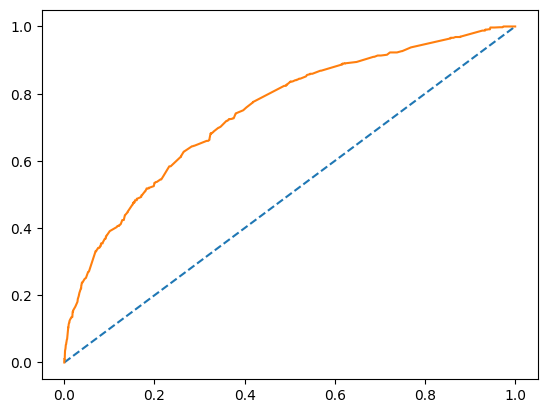

In [245]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.745


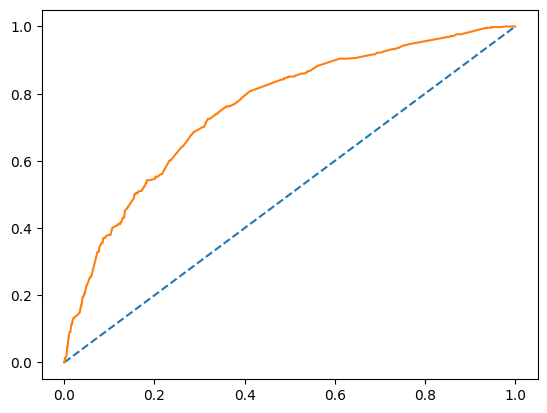

In [246]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [247]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


array([0.8474359 , 0.84871795, 0.8474359 , 0.82820513, 0.84102564,
       0.83974359, 0.83846154, 0.83589744, 0.83717949, 0.84615385])

In [248]:
print("cross calidation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross calidation scores for testing dataset


array([0.82985075, 0.8238806 , 0.84776119, 0.82686567, 0.83832335,
       0.83832335, 0.83832335, 0.82934132, 0.8502994 , 0.83233533])

In [249]:
# # Import necessary libraries
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB5443
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from IPython.display import display, HTML

# # Define function to plot ROC AUC curve
# def plot_roc_auc(model, X_test, y_test, title):
#     y_pred_proba = model.predict_proba(X_test)[::, 1]
#     fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#     roc_auc = auc(fpr, tpr)
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC AUC Curve - {title}')
#     plt.legend(loc="lower right")
#     plt.show()

# # Load dataset and split into train and test
# # Replace with your dataset
# # df = pd.read_csv('your_dataset.csv')
# # X = df.drop('target', axis=1)
# # y = df['target']

# # Sample code to create dataset
# # from sklearn.datasets import make_classification
# # X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Apply SMOTE
# sm = SMOTE(random_state=1)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# print(f'Original dataset shape: {Counter(y_train)}')
# print(f'Resampled dataset shape: {Counter(y_train_res)}')

# # Define function to evaluate models
# def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, with_smote):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     # Metrics calculation
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     # Confusion Matrix
#     print(f'Confusion Matrix - {model_name} {"with SMOTE" if with_smote else "without SMOTE"}:')
#     print(confusion_matrix(y_test, y_pred))
    
#     # Classification Report
#     print(f'Classification Report - {model_name} {"with SMOTE" if with_smote else "without SMOTE"}:')
#     print(classification_report(y_test, y_pred))
    
#     # ROC AUC Curve
#     plot_roc_auc(model, X_test, y_test, f'{model_name} {"with SMOTE" if with_smote else "without SMOTE"}')
    
#     # Return metrics
#     return accuracy, precision, recall, f1

# # List of models to evaluate
# models = [
#     ('Logistic Regression', LogisticRegression(solver='liblinear')),
#     ('Decision Tree', DecisionTreeClassifier()),
#     # ('Random Forest', RandomForestClassifier(n_estimators=100)),
#     # ('Support Vector Machine', SVC(probability=True)),
#     # ('Naive Bayes', GaussianNB())
# ]

# # Evaluate models and store metrics
# results_without_smote = []
# results_with_smote = []

# # Evaluate each model without SMOTE
# print("Evaluating models without SMOTE...")
# for model_name, model in models:
#     accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test, model_name, with_smote=False)
#     results_without_smote.append([model_name, accuracy, precision, recall, f1])

# # Evaluate each model with SMOTE
# print("Evaluating models with SMOTE...")
# for model_name, model in models:
#     accuracy, precision, recall, f1 = evaluate_model(model, X_train_res, y_train_res, X_test, y_test, model_name, with_smote=True)
#     results_with_smote.append([model_name, accuracy, precision, recall, f1])

# # Convert results to DataFrames for better visualization
# results_df_without_smote = pd.DataFrame(results_without_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# results_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# # Display final comparison tables
# display(HTML("<h2>Model Comparison Table Without SMOTE</h2>"))
# display(HTML(results_df_without_smote.to_html(index=False)))

# display(HTML("<h2>Model Comparison Table With SMOTE</h2>"))
# display(HTML(results_df_with_smote.to_html(index=False)))

# # Save the comparison tables to CSV files for further analysis
# results_df_without_smote.to_csv('model_comparison_table_without_smote.csv', index=False)
# results_df_with_smote.to_csv('model_comparison_table_with_smote.csv', index=False)

# # Discussing precision vs recall for churn model
# print("\nDiscussion: Precision vs Recall for Churn Model")
# print("--------------------------------------------------")
# print("In the context of a churn model, recall is often more important than precision.")
# print("Reason: In churn prediction, the cost of missing a customer who will churn (false negative) is higher than mistakenly identifying a customer as a potential churn (false positive).")
# print("By maximizing recall, we ensure that we identify as many actual churners as possible, allowing for targeted retention efforts to reduce churn rates.")


In [250]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import display, HTML


In [251]:
def plot_roc_auc(model, X_test, y_test, title):
    y_pred_proba = model.predict_proba(X_test)[::, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()


## SMOTE for Imbalanced Data

In [253]:
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print(f'Original dataset shape: {Counter(y_train)}')
print(f'Resampled dataset shape: {Counter(y_train_res)}')


Original dataset shape: Counter({0.0: 6493, 1.0: 1307})
Resampled dataset shape: Counter({0.0: 6493, 1.0: 6493})


## Function to Evaluate Models

In [279]:
def plot_confusion_matrix(y_test, y_pred, model_name, with_smote):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No Churn', 'Predicted Churn'], yticklabels=['Actual No Churn', 'Actual Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name} {"with SMOTE" if with_smote else "without SMOTE"}')
    plt.show()


In [280]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, with_smote):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion Matrix
    # print(f'Confusion Matrix - {model_name} {"with SMOTE" if with_smote else "without SMOTE"}:')
    # print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model_name, with_smote)
    
    # Classification Report
    print(f'Classification Report - {model_name} {"with SMOTE" if with_smote else "without SMOTE"}:')
    print(classification_report(y_test, y_pred))
    
    # ROC AUC Curve
    plot_roc_auc(model, X_test, y_test, f'{model_name} {"with SMOTE" if with_smote else "without SMOTE"}')
    
    # Return metrics
    return accuracy, precision, recall, f1


## Evaluate Each Model Without SMOTE

In [281]:
# # List of models to evaluate
# models = [
#     ('Logistic Regression', LogisticRegression(solver='liblinear')),
#     ('Decision Tree', DecisionTreeClassifier()),
#     # Add other models as needed
# ]

# # Evaluate models and store metrics
# results_without_smote = []

# print("Evaluating models without SMOTE...")
# for model_name, model in models:
#     accuracy, precision, recall, f1 = evaluate_model(model, X_train, y_train, X_test, y_test, model_name, with_smote=False)
#     results_without_smote.append([model_name, accuracy, precision, recall, f1])


## Evaluate Each Model With SMOTE

In [282]:
# results_with_smote = []

# print("Evaluating models with SMOTE...")
# for model_name, model in models:
#     accuracy, precision, recall, f1 = evaluate_model(model, X_train_res, y_train_res, X_test, y_test, model_name, with_smote=True)
#     results_with_smote.append([model_name, accuracy, precision, recall, f1])


In [283]:
# # Convert results to DataFrames for better visualization
# results_df_without_smote = pd.DataFrame(results_without_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
# results_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# # Display final comparison tables
# display(HTML("<h2>Model Comparison Table Without SMOTE</h2>"))
# display(HTML(results_df_without_smote.to_html(index=False)))

# display(HTML("<h2>Model Comparison Table With SMOTE</h2>"))
# display(HTML(results_df_with_smote.to_html(index=False)))

# # Save the comparison tables to CSV files for further analysis
# results_df_without_smote.to_csv('model_comparison_table_without_smote.csv', index=False)
# results_df_with_smote.to_csv('model_comparison_table_with_smote.csv', index=False)


In [284]:
# # Discussing precision vs recall for churn model
# print("\nDiscussion: Precision vs Recall for Churn Model")
# print("--------------------------------------------------")
# print("In the context of a churn model, recall is often more important than precision.")
# print("Reason: In churn prediction, the cost of missing a customer who will churn (false negative) is higher than mistakenly identifying a customer as a potential churn (false positive).")
# print("By maximizing recall, we ensure that we identify as many actual churners as possible, allowing for targeted retention efforts to reduce churn rates.")


In [285]:
# # Logistic Regression without SMOTE
# logistic_regression_model = LogisticRegression(solver='liblinear')
# evaluate_model(logistic_regression_model, X_train_res, y_train_res, X_test, y_test, 'Logistic Regression', with_smote=False)

# # Logistic Regression with SMote
# evaluate_model(logistic_regression_model, X_train_res, y_train_res, X_test, y_test, 'Logistic Regression', with_smote=True)


In [286]:
# # Decision Tree without SMOTE
# decision_tree_model = DecisionTreeClassifier()
# evaluate_model(decision_tree_model, X_train_res, y_train_res, X_test, y_test, 'Decision Tree', with_smote=False)

# # Decision Tree with SMOTE
# evaluate_model(decision_tree_model, X_train_res, y_train_res, X_test, y_test, 'Decision Tree', with_smote=True)
    

In [287]:
# # Random Forest without SMOTE
# random_forest_model = RandomForestClassifier(n_estimators=100)
# evaluate_model(random_forest_model, X_train_res, y_train_res, X_test, y_test, 'Random Forest', with_smote=False)

# # Random Forest with SMOTE
# evaluate_model(random_forest_model, X_train_res, y_train_res, X_test, y_test, 'Random Forest', with_smote=True)


In [288]:
# # Support Vector Machine without SMOTE
# svm_model = SVC(probability=True)
# evaluate_model(svm_model, X_train_res, y_train_res, X_test, y_test, 'Support Vector Machine', with_smote=False)

# # Support Vector Machine with SMOTE
# evaluate_model(svm_model, X_train_res, y_train_res, X_test, y_test, 'Support Vector Machine', with_smote=True)


In [289]:
# # Naive Bayes without SMOTE
# naive_bayes_model = GaussianNB()
# evaluate_model(naive_bayes_model, X_train_res, y_train_res, X_test, y_test, 'Naive Bayes', with_smote=False)

# # Naive Bayes with SMOTE
# evaluate_model(naive_bayes_model, X_train_res, y_train_res, X_test, y_test, 'Naive Bayes', with_smote=True)


In [290]:
# best_model = random_forest_model

In [291]:

# import pickle
# with open('best_model.pkl', 'wb') as file:
#     pickle.dump(best_model, file)

In [292]:
# ------------------------------------------------------------------------------

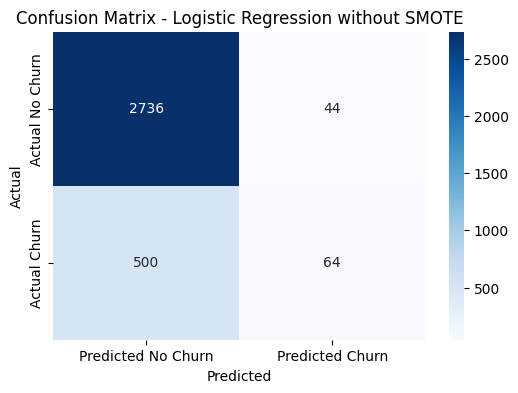

Classification Report - Logistic Regression without SMOTE:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2780
         1.0       0.59      0.11      0.19       564

    accuracy                           0.84      3344
   macro avg       0.72      0.55      0.55      3344
weighted avg       0.80      0.84      0.79      3344



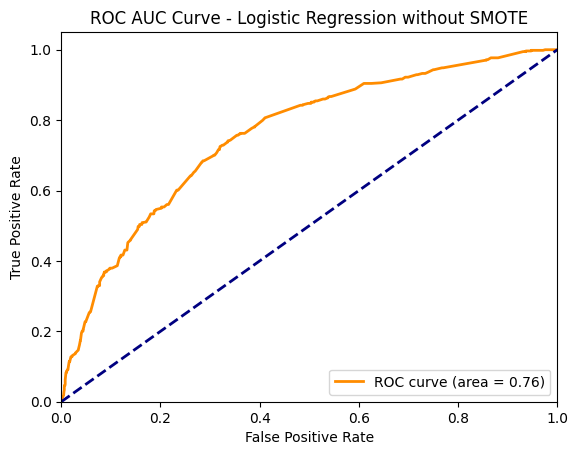

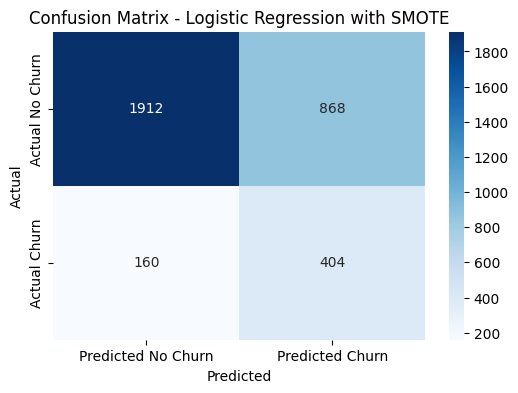

Classification Report - Logistic Regression with SMOTE:
              precision    recall  f1-score   support

         0.0       0.92      0.69      0.79      2780
         1.0       0.32      0.72      0.44       564

    accuracy                           0.69      3344
   macro avg       0.62      0.70      0.61      3344
weighted avg       0.82      0.69      0.73      3344



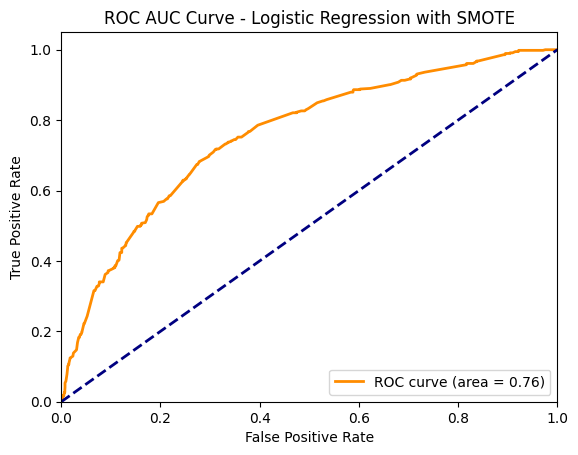

In [293]:
# Store results for comparison
results_without_smote = []
results_with_smote = []

# Logistic Regression without SMOTE
logistic_regression_model = LogisticRegression(solver='liblinear')
acc, prec, rec, f1 = evaluate_model(logistic_regression_model, X_train, y_train, X_test, y_test, 'Logistic Regression', with_smote=False)
results_without_smote.append(['Logistic Regression', acc, prec, rec, f1])

# Logistic Regression with SMOTE
acc, prec, rec, f1 = evaluate_model(logistic_regression_model, X_train_res, y_train_res, X_test, y_test, 'Logistic Regression', with_smote=True)
results_with_smote.append(['Logistic Regression', acc, prec, rec, f1])


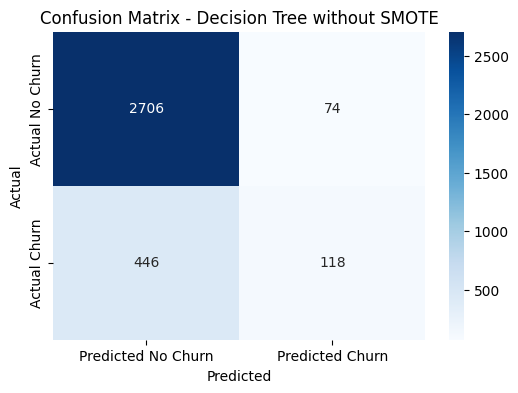

Classification Report - Decision Tree without SMOTE:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2780
         1.0       0.61      0.21      0.31       564

    accuracy                           0.84      3344
   macro avg       0.74      0.59      0.61      3344
weighted avg       0.82      0.84      0.81      3344



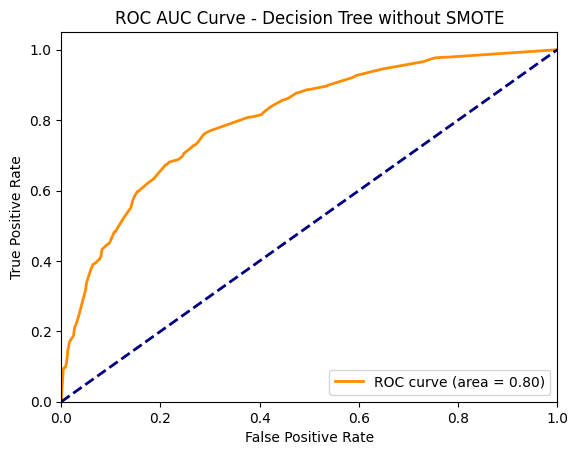

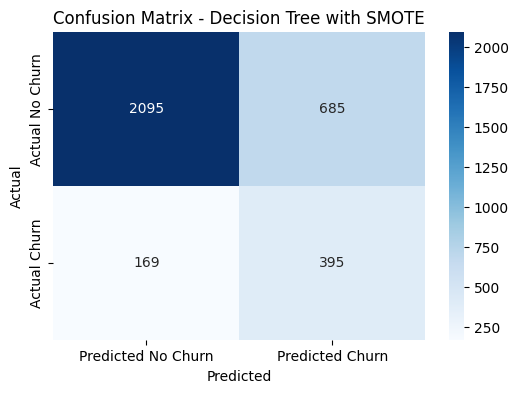

Classification Report - Decision Tree with SMOTE:
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2780
         1.0       0.37      0.70      0.48       564

    accuracy                           0.74      3344
   macro avg       0.65      0.73      0.66      3344
weighted avg       0.83      0.74      0.77      3344



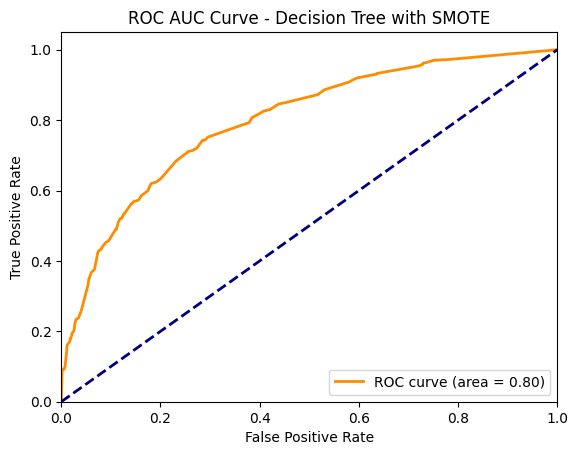

In [294]:
# Decision Tree without SMOTE
decision_tree_model = DecisionTreeClassifier()
acc, prec, rec, f1 = evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, 'Decision Tree', with_smote=False)
results_without_smote.append(['Decision Tree', acc, prec, rec, f1])

# Decision Tree with SMOTE
acc, prec, rec, f1 = evaluate_model(decision_tree_model, X_train_res, y_train_res, X_test, y_test, 'Decision Tree', with_smote=True)
results_with_smote.append(['Decision Tree', acc, prec, rec, f1])


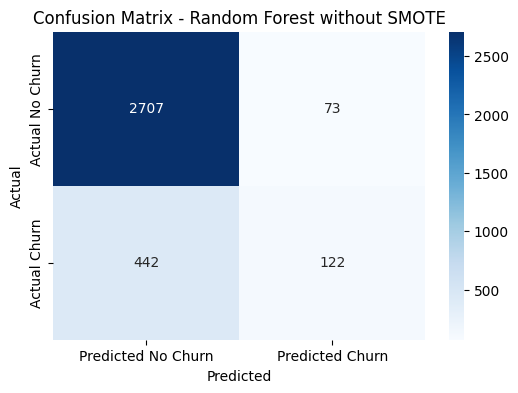

Classification Report - Random Forest without SMOTE:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2780
         1.0       0.63      0.22      0.32       564

    accuracy                           0.85      3344
   macro avg       0.74      0.60      0.62      3344
weighted avg       0.82      0.85      0.81      3344



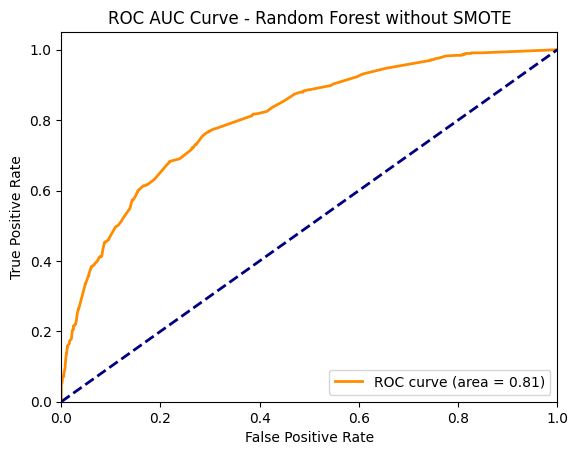

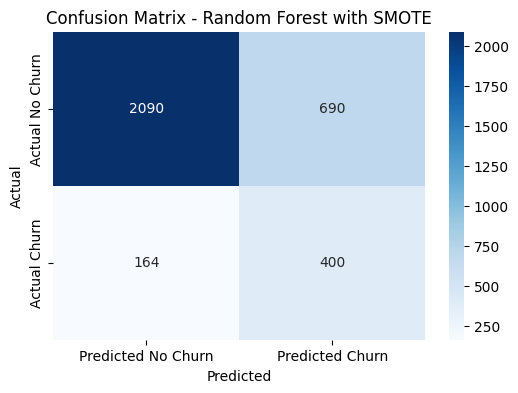

Classification Report - Random Forest with SMOTE:
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2780
         1.0       0.37      0.71      0.48       564

    accuracy                           0.74      3344
   macro avg       0.65      0.73      0.66      3344
weighted avg       0.83      0.74      0.77      3344



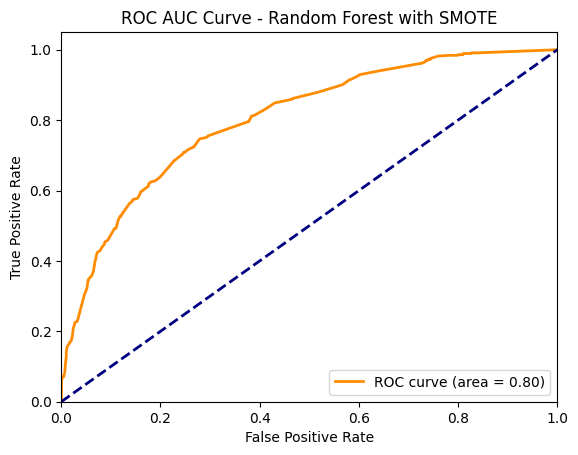

In [295]:
# Random Forest without SMOTE
random_forest_model = RandomForestClassifier(n_estimators=100)
acc, prec, rec, f1 = evaluate_model(random_forest_model, X_train, y_train, X_test, y_test, 'Random Forest', with_smote=False)
results_without_smote.append(['Random Forest', acc, prec, rec, f1])

# Random Forest with SMOTE
acc, prec, rec, f1 = evaluate_model(random_forest_model, X_train_res, y_train_res, X_test, y_test, 'Random Forest', with_smote=True)
results_with_smote.append(['Random Forest', acc, prec, rec, f1])


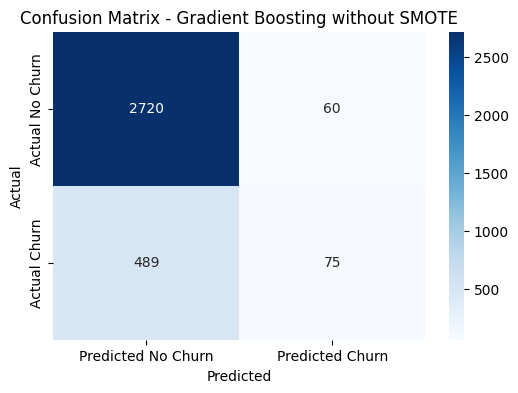

Classification Report - Gradient Boosting without SMOTE:
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      2780
         1.0       0.56      0.13      0.21       564

    accuracy                           0.84      3344
   macro avg       0.70      0.56      0.56      3344
weighted avg       0.80      0.84      0.79      3344



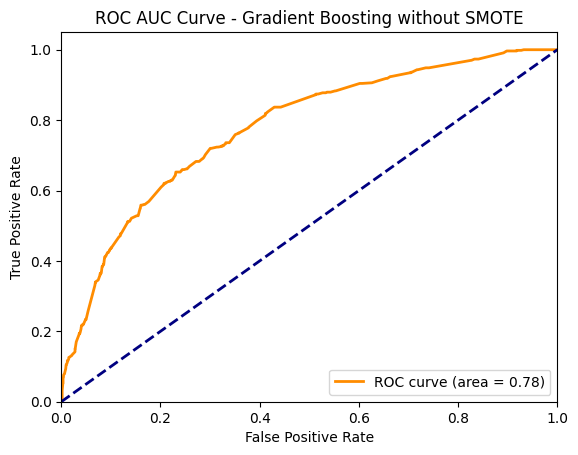

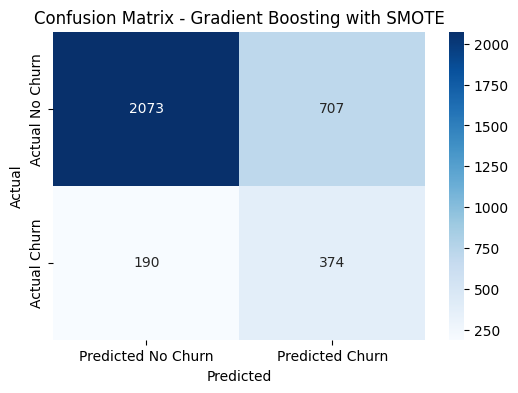

Classification Report - Gradient Boosting with SMOTE:
              precision    recall  f1-score   support

         0.0       0.92      0.75      0.82      2780
         1.0       0.35      0.66      0.45       564

    accuracy                           0.73      3344
   macro avg       0.63      0.70      0.64      3344
weighted avg       0.82      0.73      0.76      3344



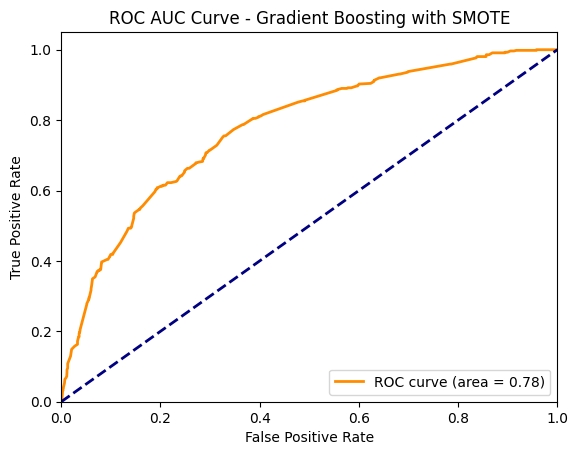

In [296]:
# Gradient Boosting without SMOTE
gradient_boosting_model = GradientBoostingClassifier()
acc, prec, rec, f1 = evaluate_model(gradient_boosting_model, X_train, y_train, X_test, y_test, 'Gradient Boosting', with_smote=False)
results_without_smote.append(['Gradient Boosting', acc, prec, rec, f1])

# Gradient Boosting with SMOTE
acc, prec, rec, f1 = evaluate_model(gradient_boosting_model, X_train_res, y_train_res, X_test, y_test, 'Gradient Boosting', with_smote=True)
results_with_smote.append(['Gradient Boosting', acc, prec, rec, f1])


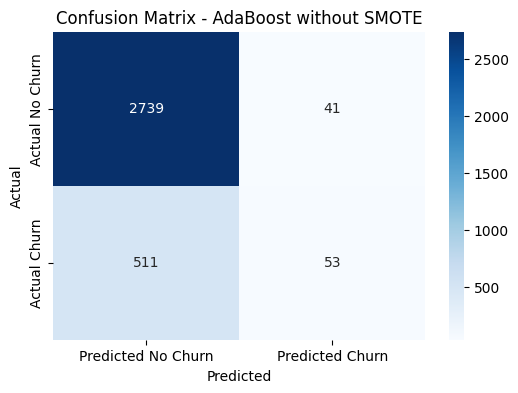

Classification Report - AdaBoost without SMOTE:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2780
         1.0       0.56      0.09      0.16       564

    accuracy                           0.83      3344
   macro avg       0.70      0.54      0.53      3344
weighted avg       0.80      0.83      0.78      3344



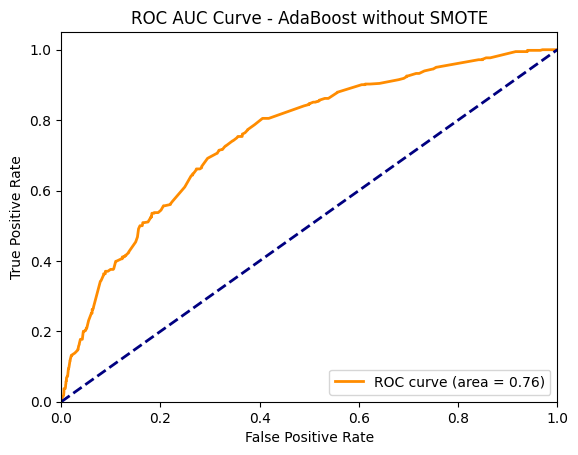

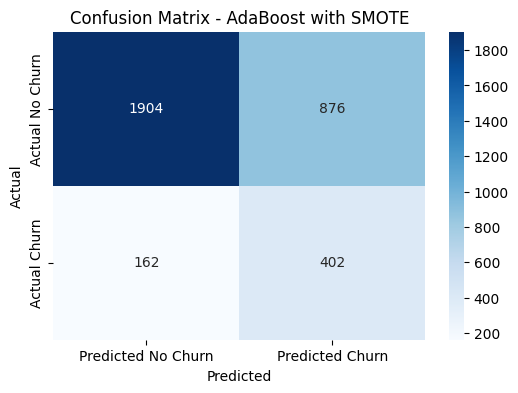

Classification Report - AdaBoost with SMOTE:
              precision    recall  f1-score   support

         0.0       0.92      0.68      0.79      2780
         1.0       0.31      0.71      0.44       564

    accuracy                           0.69      3344
   macro avg       0.62      0.70      0.61      3344
weighted avg       0.82      0.69      0.73      3344



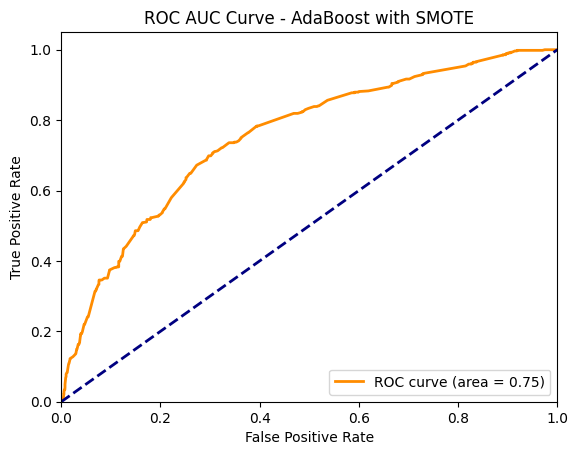

In [297]:
# AdaBoost without SMOTE
adaboost_model = AdaBoostClassifier()
acc, prec, rec, f1 = evaluate_model(adaboost_model, X_train, y_train, X_test, y_test, 'AdaBoost', with_smote=False)
results_without_smote.append(['AdaBoost', acc, prec, rec, f1])

# AdaBoost with SMOTE
acc, prec, rec, f1 = evaluate_model(adaboost_model, X_train_res, y_train_res, X_test, y_test, 'AdaBoost', with_smote=True)
results_with_smote.append(['AdaBoost', acc, prec, rec, f1])


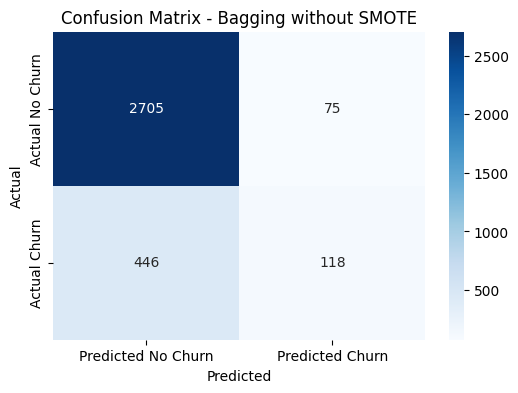

Classification Report - Bagging without SMOTE:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      2780
         1.0       0.61      0.21      0.31       564

    accuracy                           0.84      3344
   macro avg       0.73      0.59      0.61      3344
weighted avg       0.82      0.84      0.81      3344



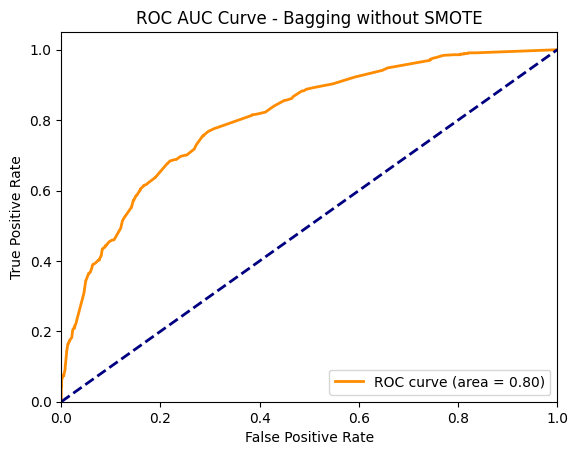

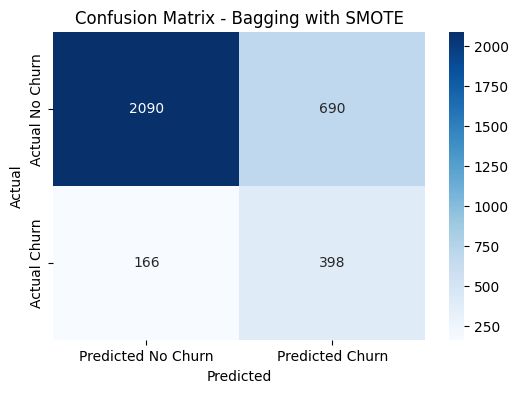

Classification Report - Bagging with SMOTE:
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2780
         1.0       0.37      0.71      0.48       564

    accuracy                           0.74      3344
   macro avg       0.65      0.73      0.66      3344
weighted avg       0.83      0.74      0.77      3344



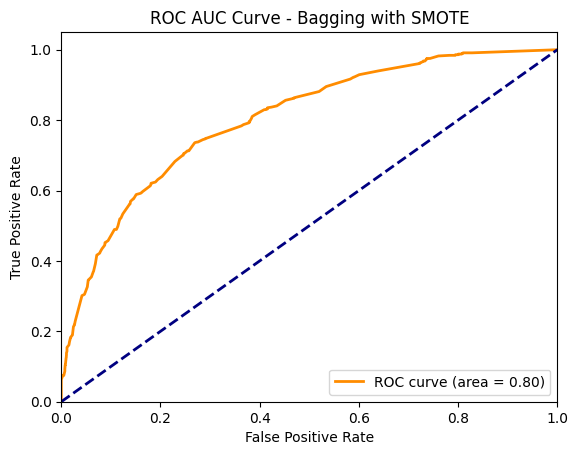

In [298]:
# Bagging without SMOTE
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)
acc, prec, rec, f1 = evaluate_model(bagging_model,X_train, y_train, X_test, y_test, 'Bagging', with_smote=False)
results_without_smote.append(['Bagging', acc, prec, rec, f1])

# Bagging with SMOTE
acc, prec, rec, f1 = evaluate_model(bagging_model, X_train_res, y_train_res, X_test, y_test, 'Bagging', with_smote=True)
results_with_smote.append(['Bagging', acc, prec, rec, f1])


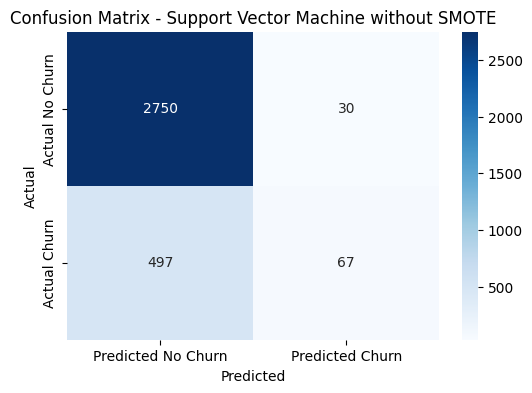

Classification Report - Support Vector Machine without SMOTE:
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      2780
         1.0       0.69      0.12      0.20       564

    accuracy                           0.84      3344
   macro avg       0.77      0.55      0.56      3344
weighted avg       0.82      0.84      0.79      3344



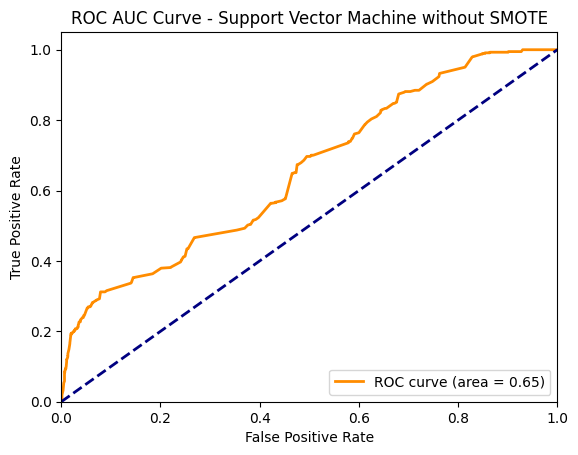

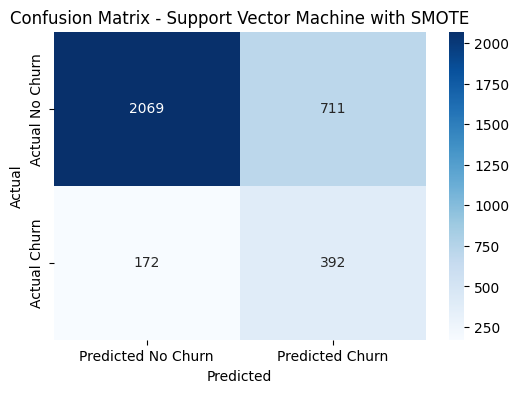

Classification Report - Support Vector Machine with SMOTE:
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      2780
         1.0       0.36      0.70      0.47       564

    accuracy                           0.74      3344
   macro avg       0.64      0.72      0.65      3344
weighted avg       0.83      0.74      0.76      3344



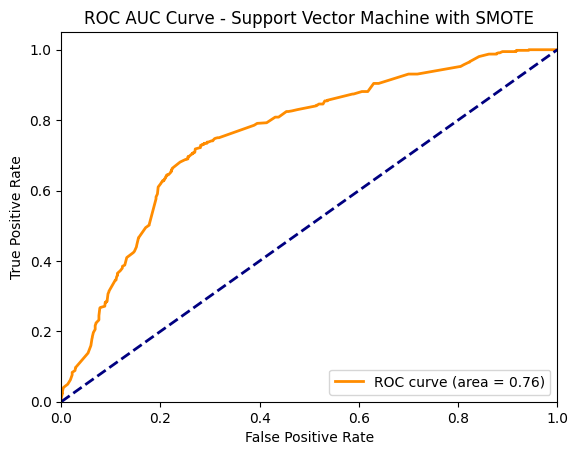

In [299]:
# Support Vector Machine without SMOTE
svm_model = SVC(probability=True)
acc, prec, rec, f1 = evaluate_model(svm_model, X_train, y_train, X_test, y_test, 'Support Vector Machine', with_smote=False)
results_without_smote.append(['Support Vector Machine', acc, prec, rec, f1])

# Support Vector Machine with SMOTE
acc, prec, rec, f1 = evaluate_model(svm_model, X_train_res, y_train_res, X_test, y_test, 'Support Vector Machine', with_smote=True)
results_with_smote.append(['Support Vector Machine', acc, prec, rec, f1])


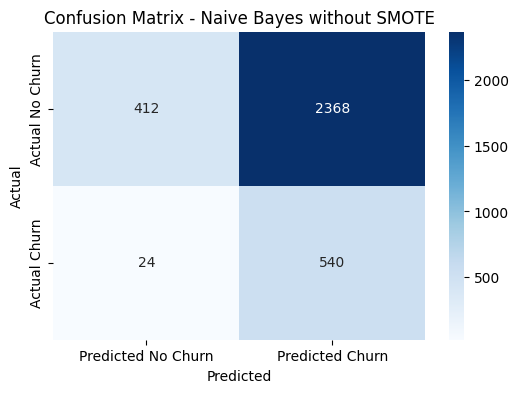

Classification Report - Naive Bayes without SMOTE:
              precision    recall  f1-score   support

         0.0       0.94      0.15      0.26      2780
         1.0       0.19      0.96      0.31       564

    accuracy                           0.28      3344
   macro avg       0.57      0.55      0.28      3344
weighted avg       0.82      0.28      0.27      3344



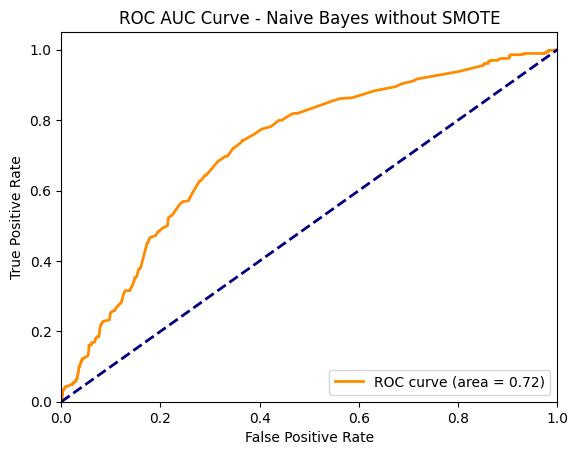

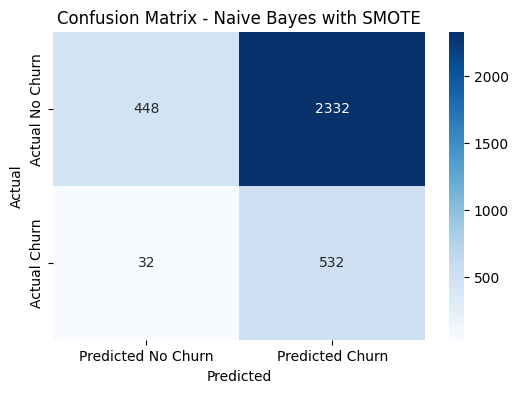

Classification Report - Naive Bayes with SMOTE:
              precision    recall  f1-score   support

         0.0       0.93      0.16      0.27      2780
         1.0       0.19      0.94      0.31       564

    accuracy                           0.29      3344
   macro avg       0.56      0.55      0.29      3344
weighted avg       0.81      0.29      0.28      3344



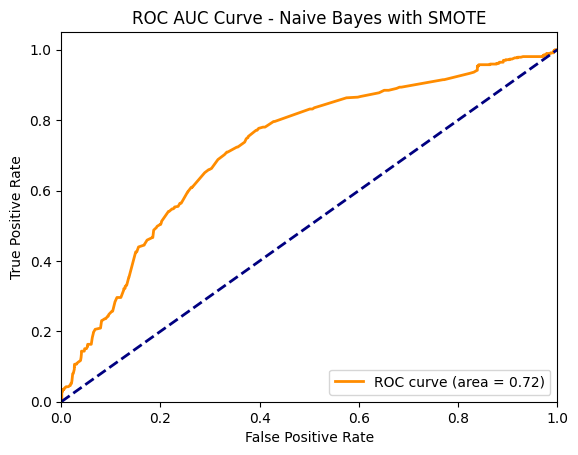

In [300]:
# Naive Bayes without SMOTE
naive_bayes_model = GaussianNB()
acc, prec, rec, f1 = evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test, 'Naive Bayes', with_smote=False)
results_without_smote.append(['Naive Bayes', acc, prec, rec, f1])

# Naive Bayes with SMOTE
acc, prec, rec, f1 = evaluate_model(naive_bayes_model, X_train_res, y_train_res, X_test, y_test, 'Naive Bayes', with_smote=True)
results_with_smote.append(['Naive Bayes', acc, prec, rec, f1])


In [301]:
# Convert results to DataFrames for better visualization
results_df_without_smote = pd.DataFrame(results_without_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_df_with_smote = pd.DataFrame(results_with_smote, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display final comparison tables
display(HTML("<h2>Model Comparison Table Without SMOTE</h2>"))
display(HTML(results_df_without_smote.to_html(index=False)))

display(HTML("<h2>Model Comparison Table With SMOTE</h2>"))
display(HTML(results_df_with_smote.to_html(index=False)))
# Display final comparison tables
# print("Model Comparison Table Without SMOTE")
# print(results_df_without_smote)

# print("Model Comparison Table With SMOTE")
# print(results_df_with_smote)

# # Save the comparison tables to CSV files for further analysis
# results_df_without_smote.to_csv('model_comparison_table_without_smote.csv', index=False)
# results_df_with_smote.to_csv('model_comparison_table_with_smote.csv', index=False)


In [302]:
best_model = random_forest_model

In [303]:

import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)